In [1]:
import sys

sys.path.insert(0, '/global/homes/m/mgatti/clustering-z/WZ_utils/')
from covariance_routines import *
from load_routines import *
import numpy as np
from plotting import *
#from magnification_mcmc import *

from scipy.interpolate import interp1d
import copy

#save_all = load_obj("info_wz_eboss")

#save_all_mg = load_obj("info_wz_eboss_eboss")


save_all,save_all_mg  = load_obj("info_wz"),load_obj("info_wz_WL_rm_small")

save_all_eboss,save_all_mg_eboss  = load_obj("info_wz_eboss"),load_obj("info_wz_eboss_eboss")


/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [1]:
1

1

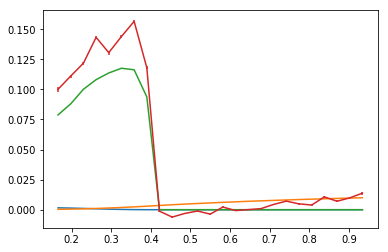

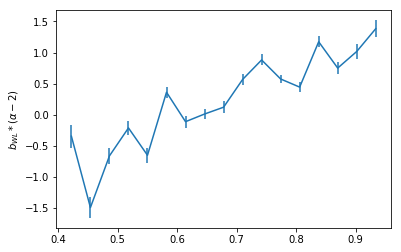

1.0
[2.         2.         2.         2.         2.         2.
 2.         2.         1.82766238 1.25446673 1.66923448 1.89404517
 1.67464351 2.18079759 1.94426134 2.00581855 2.06055133 2.28330569
 2.44028543 2.28725503 2.22203788 2.58638151 2.37505585 2.50829244
 2.69151424]


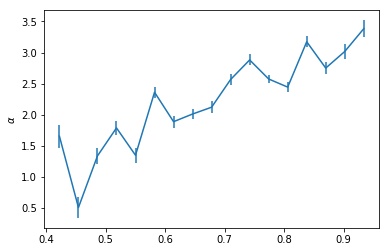

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:148: RuntimeWarning: divide by zero encountered in divide
/global/homes/m/mgatti/clustering-z/WZ_utils/plotting.py:325: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.array([data[i,kkk,:]/theory[i, kkk] for kkk in range(len(theory[0,:]))]))


bin:  1
bin:  2
bin:  3
bin:  1
bin:  2
bin:  3


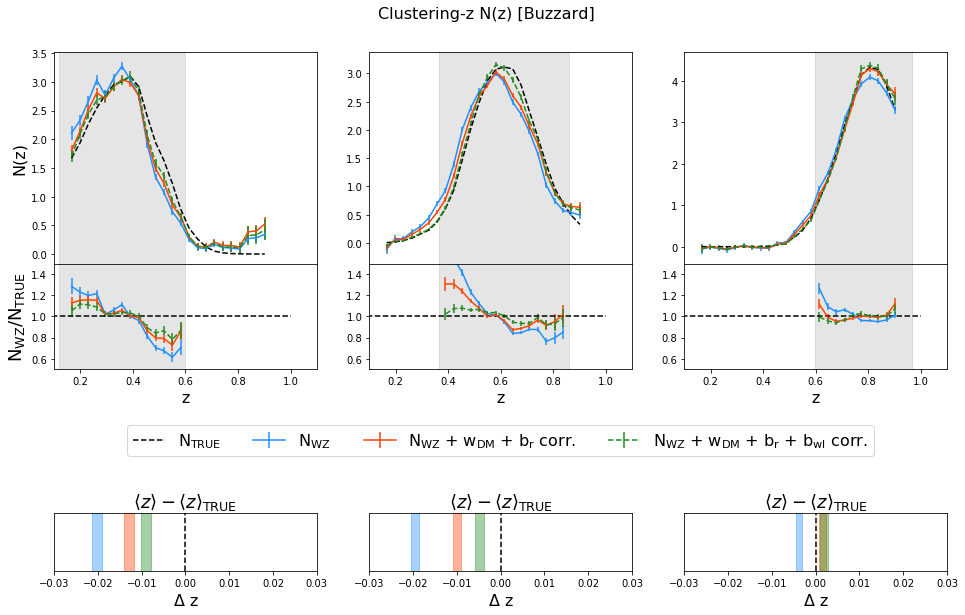

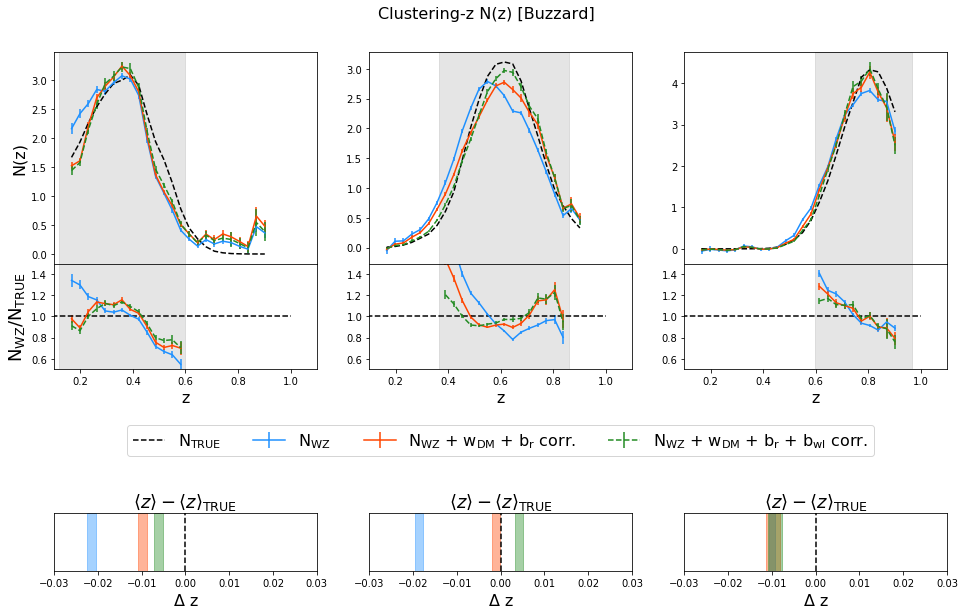

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
from matplotlib.gridspec import GridSpec
zmin_norm = [0.1,0.1,0.1,0.1]
zmax_norm = [0.91,0.91,0.91,0.91]
sigma = 2.0

zmin_norm = [0.1,0.1,0.1,0.1]
zmax_norm = [1.1,1.1,1.1,1.1]
zmax_norm = [0.93,0.93,0.93,0.93,0.93]
sigma = 2.0

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c2="dodgerblue"# rgb_to_hex((29, 96, 96))
c3=1#rgb_to_hex((200, 14, 50)) 
c23="orangered"#((121, 13, 179)) 
c4=rgb_to_hex((121, 183, 179)) 


# load magnification coefficients from rmg ********

mvo = dict()
awl_a = np.linspace(-5,5,30)
bwl_a = np.linspace(0.,5.0,40)

# **************************************************

%matplotlib inline
import matplotlib.pyplot as plt
# load magnification **************
zz = save_all_mg['info']['z_ref']
n_jck = save_all_mg['n_jck']

b = np.sqrt(save_all_mg['runs']['bz'][0,:,0]*save_all_mg['bwl'][0,:,0])


norm = np.trapz(save_all_mg['nz_theory'][0,zz<0.4],zz[zz<0.4])


norm1 = np.trapz(save_all_mg['runs']['Nz'][0,zz<0.4,0]/b[zz<0.4],zz[zz<0.4])
norm2 = np.trapz(save_all_mg['runs']['Nz'][0,zz<0.4,0],zz[zz<0.4])

norm=norm1=norm2=1.
cov = covariance_jck(save_all_mg['runs']['Nz'][0,:,1:]/norm1 ,save_all_mg['n_jck'],"jackknife")


plt.plot(zz,save_all_mg['mag_pos'][0,:]/norm )
plt.plot(zz,save_all_mg['mag_pos1'][0,:]/norm )
plt.plot(zz,save_all_mg['nz_theory'][0,:]/norm )

#plt.errorbar(zz,save_all_mg['runs']['Nz'][0,:,0]/norm2 ,cov['err'])
#plt.errorbar(zz,save_all_mg['runs']['Nz'][0,:,0]/norm1/b ,cov['err']/b)
plt.errorbar(zz,save_all_mg['runs']['Nz'][0,:,0]/norm2 ,cov['err'])

plt.show()



mag= np.zeros((len(zz[zz>0.4]),n_jck+1))
for j in range(n_jck+1):
    mag[:,j] = save_all_mg['runs']['Nz'][0,zz>0.4,j]/(save_all_mg['mag_pos1'][0,zz>0.4])

cov = covariance_jck(mag[:,1:] ,save_all_mg['n_jck'],"jackknife")

bwl_aa = norm/norm2
plt.errorbar(zz[zz>0.4],bwl_aa*mag[:,0] ,bwl_aa *cov['err'])
plt.ylabel(r"$b_{WL} * (\alpha -2)$")

plt.show()
plt.errorbar(zz[zz>0.4],mag[:,0] +2 ,cov['err'])

plt.ylabel(r"$\alpha$")

alpha_mag = 2*np.ones(len(zz))
alpha_mag[zz>0.4] = mag[:,0]/2.+2
print bwl_aa
print alpha_mag
plt.show()

# *************************************************************************************

mag = [2.1992565055762032, 1.1260349586016536, 1.6401489505754876, 1.1769230769230745, 3.8815135135135055, 3.8750975800156042]
mage = [0.41277093636528567, 0.16342380922795866, 0.16962326407692202, 0.1366811572040494, 0.2980950421753201, 0.32674055402984775]
binedges = np.linspace(0.05,1.05,len(mag)+1)

bincentres = (binedges[1:]+binedges[:-1])/2.
fmag = interp1d(bincentres,np.array(mag))
#alpha = fmag(save_all['info']['z_ref'])

systematics = dict()
k = 0
for run_i, run in enumerate([save_all['runs'][1],save_all['runs'][2]]):#,save_all['runs'][2]]):
    mute_systematics = dict()
    mvoo =dict()
    nnr = True

    data_vect = copy.copy(run)

    if run_i ==10:
        z_ref = save_all['info']['z_ref']+save_all["rmg_shift"]
    else:
        z_ref= save_all['info']['z_ref']#+save_all["rmg_shift"]
    z_reft =  save_all['info']['z_ref']
    
    #fig, ax = plt.subplots(3,3, figsize=(15,8))
    #fig.subplots_adjust(wspace=0.4,hspace=0.5)

    fig = plt.figure(figsize=(16,8))
    fig.suptitle("Clustering-z N(z) [Buzzard]",size=16)

    gs = GridSpec(2, 3, width_ratios=[1, 1,1], height_ratios=[0.6, 0.3],top=0.9, bottom=0.35, hspace=0.)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    ax4 = fig.add_subplot(gs[3])
    ax5 = fig.add_subplot(gs[4])
    ax6 = fig.add_subplot(gs[5])

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel("z",size=16)
    ax5.set_xlabel("z",size=16)
    ax6.set_xlabel("z",size=16)
    gs1 = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.2],top=0.1, bottom=0., hspace=0.1)

    ax7 = fig.add_subplot(gs1[0])
    ax8 = fig.add_subplot(gs1[1])
    ax9 = fig.add_subplot(gs1[2])

    ax7.set_yticks([])
    ax8.set_yticks([])
    ax9.set_yticks([])
    ax7.set_xlabel("$\Delta$ z",size=16)
    ax8.set_xlabel("$\Delta$ z",size=16)
    ax9.set_xlabel("$\Delta$ z",size=16)
    ax = np.array([[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]])

    
    systematic_dict = dict()
    
    correction_cosmo_boot = copy.copy(save_all['auto_theory_jk'])
    for u in range(4):
        for kz in range(save_all['bins_ref']):
            xxxxx = 1./save_all['auto_theory_jk'][u,:,kz]
            if len(xxxxx[xxxxx>10000])>0:    
                correction_cosmo_boot[u,:,kz] = correction_cosmo_boot[u,:,0]

                    
    for i in range(3):
        mute_dict = dict()
        print "bin: ",i+1
        tht = np.array(save_all['true_binned'])
        #compute bias refrence
        bias =  compute_bias(data_vect['bz'],save_all['auto_theory'],i)
        
        if run_i==10:
            print ("change")
            for kz in range(save_all['bins_ref']):
                data_vect['Nz'][i,kz,:]=data_vect['Nz'][i,kz,:]*(save_all['nz_theory']/save_all['rnz_theory'])[i,kz]
                
        # we use the auto correlation of the dark matter as w_dm(z)
        th_correction = compute_th_correction(np.ones((save_all['auto_theory'].shape[0],save_all['auto_theory'].shape[1])),save_all['auto_theory'],i)
        th_correction1 = np.zeros((bias.shape[0],bias.shape[1]))
        for kz in range(bias.shape[1]):
            th_correction1[:,kz] = th_correction
        
        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ ',cl=c2,linestye='-', i=i,tht = tht,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
  
        #_,_,mm = plota1(ax,data_vect['Nz'],lab='Nz + br corr.',cl=c3, i=i,tht = tht,bias = bias,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)

        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ + w$_{\rm DM}$ + b$_{\rm r}$ corr.',cl=c23,linestye='-',  i=i,tht = tht,bias = bias,th_correction=th_correction1,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
        mute_dict['w_br'] = mm
        
        #try:

        bias_wl =  compute_bias(save_all['b_wl'],save_all['auto_theory'],i)
        bias_wl[np.where(np.array(bias_wl)==0.)]=1.

        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ + w$_{\rm DM}$ + b$_{\rm r}$ + b$_{\rm wl}$ corr.',cl='forestgreen', i=i,tht = tht,bias = bias*bias_wl,th_correction=th_correction1,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
        mute_dict['w_br_bl'] = mm
        
        mute_dict['bias_wl'] = bias_wl[mute_dict['w_br']['mask'],0] 
        
        # magnification run! **************************
        e_alpha = 0.001 # 50% error on coefficients, to be modified
        default_estimator = np.zeros((4,len(z_ref),save_all['n_jck']+1))

        
        masku = bias_wl[:,0] == bias_wl[:,0]
        bwl_ave =  np.trapz(bias_wl[masku,0]*tht[i][masku],z_ref[masku])/np.trapz(tht[i][masku],z_ref[masku])
        
        bwl_ave=2.
        #print (bwl_ave)
        #for jk in range(save_all['n_jck']+1):
        #    alp_bot = np.random.normal(0.,e_alpha,len(z_ref))/(save_all['n_jck']-1.)
        #    default_estimator[i,:,jk] = (data_vect["Nz"][i,:,jk]-bwl_ave*(alpha_mag*(1+alp_bot)-2.)*save_all['mag_pos1'][i,:]-bias[:,jk]*save_all['mag_pos'][i,:])#/(bias[:,jk]*bias_wl[:,jk]/th_correction1[:,0])
        #_,_,_ = plota1(ax,default_estimator,lab='Nz mag',cl='purple', i=i,tht = tht,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft,bias = bias*bias_wl,th_correction=th_correction1,)
        
        
       

        
        """
        dioc = copy.copy(data_vect['Nz'])
        for hhh in range(100):
            dioc[:,:,hhh] =dioc[:,:,0]

        _,_ = plota(ax, dioc,lab='cosmol. uncertainty',cl='purple', i=i,tht = tht,bias = bias,th_correction=correction_cosmo_boot[i,:,:],normed=nnr,boot=True,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref)
        """
        for kz in range(bias.shape[1]):
            th_correction1[:,kz] = th_correction



        minz,maxz,mm = plota1(ax, tht , lab=r'N$_{\rm TRUE}$',cl='black', i=i,tht = np.ones((tht.shape[0],tht.shape[1])),normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref =z_reft,sigma=sigma,z_reft=z_reft)
        mute_dict['true'] = mm
        mute_systematics[i]=mute_dict
        ax[0,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")
        ax[1,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")
        #ax[3,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")

        mvm = np.array([[(data_vect["Nz"][i,:,0]-bbb*(alpha_mag-2.)*save_all['mag_pos1'][i,:]-aaa*bias[:,0]*save_all['mag_pos'][i,:])/(bias[:,0]*th_correction1[:,0]) for aaa in awl_a] for bbb in bwl_a])
        mv0 = []
        for jk in range(save_all['n_jck']+1):
            # add alpha_mag unc.
            e_alpha=0.1
            alp_bot = np.random.normal(0.,e_alpha,len(z_ref))/(save_all['n_jck']-1.)
            mv0.append((data_vect["Nz"][i,:,jk]-2.*(alpha_mag*(1+alp_bot)-2.)*save_all['mag_pos1'][i,:]-0.*bias[:,jk]*save_all['mag_pos'][i,:])/(bias[:,jk]*th_correction1[:,0]) )
        mv0= np.array(mv0)
        mvoo[i] = {"z_ref":z_ref,"mvm":mvm,"tht":tht[i],"edges":[minz,maxz],"cov":covariance_jck(mv0[1:,:].T,save_all['n_jck'],"jackknife")["cov"],"norm_cov":mv0[0,:],"mvm_j":mv0[1:,:].T}

        # plot bias *******************************
        """
        maskx = (z_ref>minz) & (z_ref<maxz)
        derr = covariance_jck(bias[:,1:],100,'jackknife')
        ax[2,i].errorbar(z_ref[maskx],bias[:,0][maskx],derr['err'][maskx],linestyle = '-', label ="bias_rmg",color = "red")


        # plot bias *******************************
        derr = covariance_jck(bias_wl[:,1:],100,'jackknife')
        
        
        ax[2,i].errorbar(z_ref[maskx],bias_wl[:,0][maskx],derr['err'][maskx],linestyle = 'dashed', label ="bias_wl",color = "blue")
        yy = save_all['auto_theory'][i,:]/save_all['auto_theory'][i,0]
        ax[2,i].plot(z_ref[maskx], yy[maskx],linestyle = '-', label ="w_dm(z)",color = "green")
        ax[2,i].set_xlim([0.1,0.9])
        ax[2,i].set_ylim([0.5,2])
        ax[2,0].legend()
        ax[2,0].set_ylabel("bias redmagic")
        ax[2,i].set_ylim([0.5,1.5])
        """

        ax[0,i].set_xlim([0.1,1.1])
        ax[1,i].set_xlim([0.1,1.1])
        
        ax[2,i].set_xlim([-0.03,0.03])
        ax[1,i].set_ylim([0.5,1.5])
        ax[2,i].set_ylim([-1,1])
        ax[2,i].plot([0,0],[-1,1],color='black',linestyle='dashed')
        ax[1,i].plot([0,1],[1,1],color='black',linestyle='dashed')
        #
       
        systematic_dict[i] = mute_dict
        #ax[1,i].plot([0.1,0.85],[0.,0],color='grey')
    ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -.45),
          ncol=5,  fontsize=16)

    ax[0,0].set_ylabel("N(z)", size=16)
    ax[2,0].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    ax[2,1].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    ax[2,2].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    
    
    ax[1,0].set_ylabel(r"N$_{\rm WZ}$/N$_{\rm TRUE}$", size=18)

    #plt.tight_layout()
    mvo[k] = mvoo
    systematics[k]=mute_systematics
    k+=1
    plt.savefig("./figures/nz_{0}.pdf".format(run_i),bbox_inches="tight")

plt.show()

0.1250501070727134
0.12628551651616793
[0.09298892 0.09234847 0.09260329 0.09247835 0.09309662 0.09245193
 0.09252276 0.09235339 0.09241775 0.09220041 0.09261378 0.09263507
 0.09259722 0.09274383 0.09269171 0.09235422 0.09185331 0.09273238
 0.09215086 0.09246423 0.09308262 0.09316391 0.09309285 0.09230596
 0.09307776 0.0925017  0.09227037 0.09222471 0.09267717 0.09211633
 0.09274933 0.09264245 0.09228399 0.09271129 0.0925654  0.09256079
 0.09275805 0.09239281 0.09293435 0.09286686 0.09223158 0.09224078
 0.09285925 0.09278883 0.09317983 0.09239238 0.09257446 0.09258177
 0.09259139 0.09246837 0.09256641 0.09228182 0.0931164  0.09245582
 0.09287638 0.09250171 0.09254115 0.09237445 0.09209644 0.09242509
 0.09248486 0.09273559 0.09281755 0.09301387 0.09197946 0.0924114
 0.09306096 0.09259682 0.09233116 0.0924446  0.09329109 0.09258415
 0.09229983 0.09310983 0.09237462 0.09225325 0.09241386 0.09289519
 0.09331449 0.09288114 0.09316961 0.09266817 0.09169639 0.0927799
 0.09234959 0.09242898 0.

In [10]:
mean_syst_norm

array([0.00985472, 0.        , 0.        ])

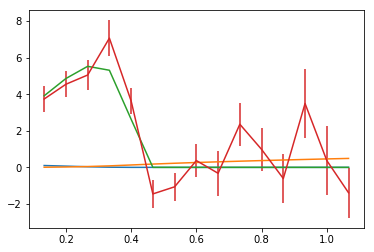

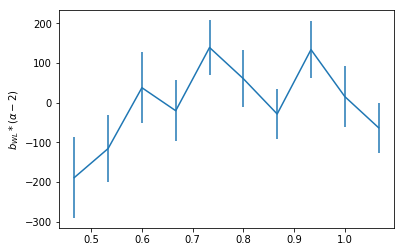

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in divide


bin:  1
0.0
bin:  2
0.0
bin:  3
0.0


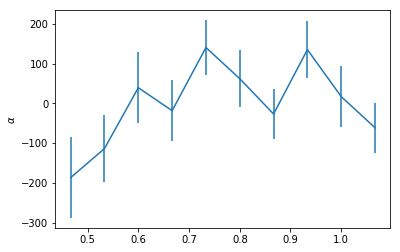

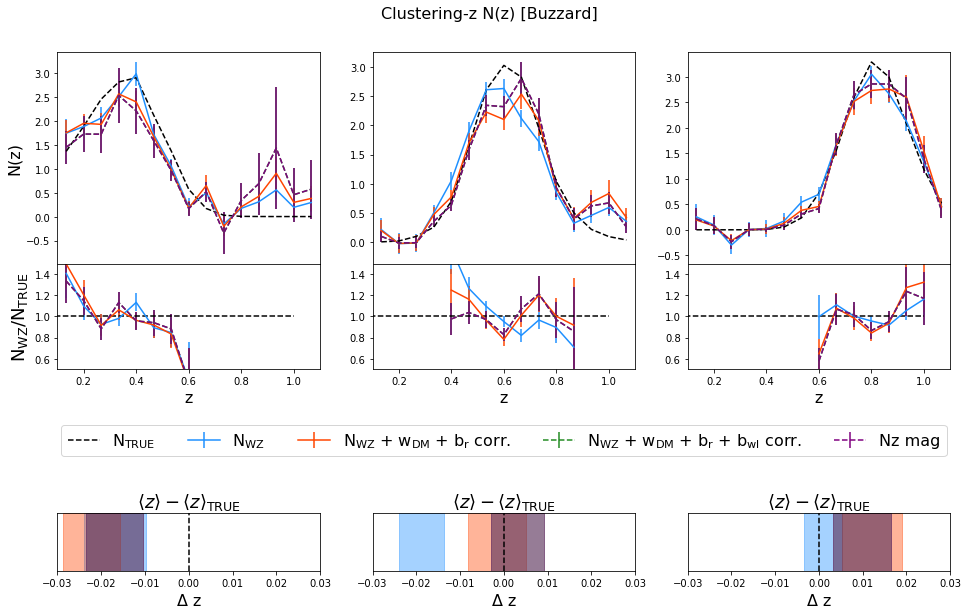

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
from matplotlib.gridspec import GridSpec
zmin_norm = [0.1,0.1,0.1,0.1]
zmax_norm = [0.91,0.91,0.91,0.91]
sigma = 2.0

zmin_norm = [0.1,0.1,0.1,0.1]
zmax_norm = [1.1,1.1,1.1,1.1]
#zmax_norm = [0.93,0.93,0.93,0.93,0.93]
sigma = 2.0

def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c2="dodgerblue"# rgb_to_hex((29, 96, 96))
c3=1#rgb_to_hex((200, 14, 50)) 
c23="orangered"#((121, 13, 179)) 
c4=rgb_to_hex((121, 183, 179)) 


# load magnification coefficients from rmg ********


%matplotlib inline
import matplotlib.pyplot as plt
# load magnification **************
zz = save_all_mg_eboss['info']['z_ref']
n_jck = save_all_mg_eboss['n_jck']

b = np.sqrt(save_all_mg_eboss['runs']['bz'][0,:,0])#*save_all_mg_eboss['bwl'][0,:,0])


norm = np.trapz(save_all_mg_eboss['nz_theory'][0,zz<0.4],zz[zz<0.4])


norm1 = np.trapz(save_all_mg_eboss['runs']['Nz'][0,zz<0.4,0]/b[zz<0.4],zz[zz<0.4])
norm2 = np.trapz(save_all_mg_eboss['runs']['Nz'][0,zz<0.4,0],zz[zz<0.4])

cov = covariance_jck(save_all_mg_eboss['runs']['Nz'][0,:,1:]/norm1 ,save_all_mg_eboss['n_jck'],"jackknife")

plt.plot(zz,save_all_mg_eboss['mag_pos'][0,:]/norm )
plt.plot(zz,save_all_mg_eboss['mag_pos1'][0,:]/norm )
plt.plot(zz,save_all_mg_eboss['nz_theory'][0,:]/norm )

plt.errorbar(zz,save_all_mg_eboss['runs']['Nz'][0,:,0]/norm1/b ,cov['err']/b)
#plt.errorbar(zz,save_all_mg['runs']['Nz'][0,:,0]/norm2 ,cov['err'])

plt.show()



mag= np.zeros((len(zz[zz>0.4]),n_jck+1))
for j in range(n_jck+1):
    mag[:,j] = save_all_mg_eboss['runs']['Nz'][0,zz>0.4,j]/(save_all_mg_eboss['mag_pos1'][0,zz>0.4]/2.)

cov = covariance_jck(mag[:,1:] ,save_all_mg_eboss['n_jck'],"jackknife")


plt.errorbar(zz[zz>0.4],mag[:,0] ,cov['err'])
plt.ylabel(r"$b_{WL} * (\alpha -2)$")

plt.show()

bwlave = 1.
plt.errorbar(zz[zz>0.4],mag[:,0]/bwlave+2 ,cov['err']/bwlave)

plt.ylabel(r"$\alpha$")

alpha_mag = 2*np.ones(len(zz))
alpha_mag[zz>0.4] = mag[:,0]/2.+2

# *************************************************************************************

mag = [2.1992565055762032, 1.1260349586016536, 1.6401489505754876, 1.1769230769230745, 3.8815135135135055, 3.8750975800156042]
mage = [0.41277093636528567, 0.16342380922795866, 0.16962326407692202, 0.1366811572040494, 0.2980950421753201, 0.32674055402984775]
binedges = np.linspace(0.05,1.05,len(mag)+1)

bincentres = (binedges[1:]+binedges[:-1])/2.
fmag = interp1d(bincentres,np.array(mag))
#alpha = fmag(save_all['info']['z_ref'])

mvo_eboss=dict()
systematics_eboss = dict()
k = 0
for run_i, run in enumerate([save_all_eboss['runs'][0]]):#,save_all['runs'][2]]):
    mute_systematics = dict()
    mvoo =dict()
    nnr = True

    data_vect = copy.copy(run)

    if run_i ==10:
        z_ref = save_all_eboss['info']['z_ref']+save_all_eboss["rmg_shift"]
    else:
        z_ref= save_all_eboss['info']['z_ref']#+save_all["rmg_shift"]
    z_reft =  save_all_eboss['info']['z_ref']
    
    #fig, ax = plt.subplots(3,3, figsize=(15,8))
    #fig.subplots_adjust(wspace=0.4,hspace=0.5)

    fig = plt.figure(figsize=(16,8))
    fig.suptitle("Clustering-z N(z) [Buzzard]",size=16)

    gs = GridSpec(2, 3, width_ratios=[1, 1,1], height_ratios=[0.6, 0.3],top=0.9, bottom=0.35, hspace=0.)
    ax1 = fig.add_subplot(gs[0])
    ax2 = fig.add_subplot(gs[1])
    ax3 = fig.add_subplot(gs[2])
    ax4 = fig.add_subplot(gs[3])
    ax5 = fig.add_subplot(gs[4])
    ax6 = fig.add_subplot(gs[5])

    ax1.set_xticks([])
    ax2.set_xticks([])
    ax3.set_xticks([])
    ax4.set_xlabel("z",size=16)
    ax5.set_xlabel("z",size=16)
    ax6.set_xlabel("z",size=16)
    gs1 = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.2],top=0.1, bottom=0., hspace=0.1)

    ax7 = fig.add_subplot(gs1[0])
    ax8 = fig.add_subplot(gs1[1])
    ax9 = fig.add_subplot(gs1[2])

    ax7.set_yticks([])
    ax8.set_yticks([])
    ax9.set_yticks([])
    ax7.set_xlabel("$\Delta$ z",size=16)
    ax8.set_xlabel("$\Delta$ z",size=16)
    ax9.set_xlabel("$\Delta$ z",size=16)
    ax = np.array([[ax1,ax2,ax3],[ax4,ax5,ax6],[ax7,ax8,ax9]])

    
    systematic_dict = dict()
    
    correction_cosmo_boot = copy.copy(save_all_eboss['auto_theory_jk'])
    for u in range(4):
        for kz in range(save_all_eboss['bins_ref']):
            xxxxx = 1./save_all_eboss['auto_theory_jk'][u,:,kz]
            if len(xxxxx[xxxxx>10000])>0:    
                correction_cosmo_boot[u,:,kz] = correction_cosmo_boot[u,:,0]

                    
    for i in range(3):
        mute_dict = dict()
        print "bin: ",i+1
        tht = np.array(save_all_eboss['true_binned'])
        #compute bias refrence
        bias =  compute_bias(data_vect['bz'],save_all_eboss['auto_theory'],i)
        
        if run_i==10:
            print ("change")
            for kz in range(save_all_eboss['bins_ref']):
                data_vect['Nz'][i,kz,:]=data_vect['Nz'][i,kz,:]*(save_all_eboss['nz_theory']/save_all_eboss['rnz_theory'])[i,kz]
                
        # we use the auto correlation of the dark matter as w_dm(z)
        th_correction = compute_th_correction(np.ones((save_all_eboss['auto_theory'].shape[0],save_all_eboss['auto_theory'].shape[1])),save_all_eboss['auto_theory'],i)
        th_correction1 = np.zeros((bias.shape[0],bias.shape[1]))
        for kz in range(bias.shape[1]):
            th_correction1[:,kz] = th_correction
        
        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ ',cl=c2,linestye='-', i=i,tht = tht,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
  
        #_,_,mm = plota1(ax,data_vect['Nz'],lab='Nz + br corr.',cl=c3, i=i,tht = tht,bias = bias,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)

        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ + w$_{\rm DM}$ + b$_{\rm r}$ corr.',cl=c23,linestye='-',  i=i,tht = tht,bias = bias,th_correction=th_correction1,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
        mute_dict['w_br'] = mm
        
        #try:

        bias_wl =  compute_bias(save_all_eboss['b_wl'],save_all_eboss['auto_theory'],i)
        bias_wl[np.where(np.array(bias_wl)==0.)]=1.

        _,_,mm = plota1(ax,data_vect['Nz'],lab=r'N$_{\rm WZ}$ + w$_{\rm DM}$ + b$_{\rm r}$ + b$_{\rm wl}$ corr.',cl='forestgreen', i=i,tht = tht,bias = bias*bias_wl,th_correction=th_correction1,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft)
        mute_dict['w_br_bl'] = mm
        mute_dict['bias_wl'] = bias_wl[mute_dict['w_br']['mask'],0] 
        
        
        # magnification run! **************************
        e_alpha = 0.001 # 50% error on coefficients, to be modified
        default_estimator = np.zeros((4,len(z_ref),save_all_eboss['n_jck']+1))

        masku = bias_wl[:,0] == bias_wl[:,0]
        
        bwl_ave =  np.trapz(bias_wl[masku,0]*tht[i][masku],z_ref[masku])/np.trapz(tht[i][masku],z_ref[masku])
        
        bwl_ave=0.
        print (bwl_ave)
        for jk in range(save_all_eboss['n_jck']+1):
            alp_bot = np.random.normal(0.,e_alpha,len(z_ref))/(save_all_eboss['n_jck']-1.)
            default_estimator[i,:,jk] = (data_vect["Nz"][i,:,jk]-bwl_ave*(alpha_mag*(1+alp_bot)-2.)*save_all_eboss['mag_pos1'][i,:]-0.*bias[:,jk]*save_all_eboss['mag_pos'][i,:])#/(bias[:,jk]*bias_wl[:,jk]/th_correction1[:,0])
        _,_,_ = plota1(ax,default_estimator,lab='Nz mag',cl='purple', i=i,tht = tht,normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref,sigma=sigma,z_reft=z_reft,bias = bias*bias_wl,th_correction=th_correction1,)
        
        
        #except:
        #    pass
        
        



        """
        dioc = copy.copy(data_vect['Nz'])
        for hhh in range(100):
            dioc[:,:,hhh] =dioc[:,:,0]

        _,_ = plota(ax, dioc,lab='cosmol. uncertainty',cl='purple', i=i,tht = tht,bias = bias,th_correction=correction_cosmo_boot[i,:,:],normed=nnr,boot=True,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref=z_ref)
        """
        for kz in range(bias.shape[1]):
            th_correction1[:,kz] = th_correction



            
        
        minz,maxz,mm = plota1(ax, tht , lab=r'N$_{\rm TRUE}$',cl='black', i=i,tht = np.ones((tht.shape[0],tht.shape[1])),normed=nnr,zmax_norm=zmax_norm,zmin_norm=zmin_norm,z_ref =z_reft,sigma=sigma,z_reft=z_reft)
        mute_dict['true'] = mm
        mute_systematics[i]=mute_dict
        """ 
        ax[0,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")
        ax[1,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")
        #ax[3,i].axvspan(minz,maxz , alpha = 0.2,color = "grey")

        mvm = np.array([[(data_vect["Nz"][i,:,0]-bbb*(alpha_mag-2.)*save_all_eboss['mag_pos1'][i,:]-aaa*bias[:,0]*save_all_eboss['mag_pos'][i,:])/(bias[:,0]*th_correction1[:,0]) for aaa in awl_a] for bbb in bwl_a])
        mv0 = []
        for jk in range(save_all['n_jck']+1):
            # add alpha_mag unc.
            e_alpha=0.1
            alp_bot = np.random.normal(0.,e_alpha,len(z_ref))/(save_all_eboss['n_jck']-1.)
            mv0.append((data_vect["Nz"][i,:,jk]-2.*(alpha_mag*(1+alp_bot)-2.)*save_all_eboss['mag_pos1'][i,:]-0.*bias[:,jk]*save_all_eboss['mag_pos'][i,:])/(bias[:,jk]*th_correction1[:,0]) )
        mv0= np.array(mv0)
        mvoo[i] = {"z_ref":z_ref,"mvm":mvm,"tht":tht[i],"edges":[minz,maxz],"cov":covariance_jck(mv0[1:,:].T,save_all_eboss['n_jck'],"jackknife")["cov"],"norm_cov":mv0[0,:],"mvm_j":mv0[1:,:].T}
        """
        
        


        # plot bias *******************************
        """
        maskx = (z_ref>minz) & (z_ref<maxz)
        derr = covariance_jck(bias[:,1:],100,'jackknife')
        ax[2,i].errorbar(z_ref[maskx],bias[:,0][maskx],derr['err'][maskx],linestyle = '-', label ="bias_rmg",color = "red")


        # plot bias *******************************
        derr = covariance_jck(bias_wl[:,1:],100,'jackknife')
        
        
        ax[2,i].errorbar(z_ref[maskx],bias_wl[:,0][maskx],derr['err'][maskx],linestyle = 'dashed', label ="bias_wl",color = "blue")
        yy = save_all['auto_theory'][i,:]/save_all['auto_theory'][i,0]
        ax[2,i].plot(z_ref[maskx], yy[maskx],linestyle = '-', label ="w_dm(z)",color = "green")
        ax[2,i].set_xlim([0.1,0.9])
        ax[2,i].set_ylim([0.5,2])
        ax[2,0].legend()
        ax[2,0].set_ylabel("bias redmagic")
        ax[2,i].set_ylim([0.5,1.5])
        """

        ax[0,i].set_xlim([0.1,1.1])
        ax[1,i].set_xlim([0.1,1.1])
        
        ax[2,i].set_xlim([-0.03,0.03])
        ax[1,i].set_ylim([0.5,1.5])
        ax[2,i].set_ylim([-1,1])
        ax[2,i].plot([0,0],[-1,1],color='black',linestyle='dashed')
        ax[1,i].plot([0,1],[1,1],color='black',linestyle='dashed')
        #
       
        systematic_dict[i] = mute_dict
        #ax[1,i].plot([0.1,0.85],[0.,0],color='grey')
    ax[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -.45),
          ncol=5,  fontsize=16)

    ax[0,0].set_ylabel("N(z)", size=16)
    ax[2,0].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    ax[2,1].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    ax[2,2].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
    
    mvo_eboss[k] = mvoo
 
    ax[1,0].set_ylabel(r"N$_{\rm WZ}$/N$_{\rm TRUE}$", size=18)

    #plt.tight_layout()
    systematics_eboss[k]=mute_systematics
    k+=1
    plt.savefig("./figures/nz_{0}.pdf".format(k),bbox_inches="tight")

plt.show()

In [12]:
systematics_eboss

{0: {}}

# total systematic

In [8]:
# consider as systematic: 
#'Nz +  wdm, br corr.'
#    'Nz + wdm, br, bw corr.' 
string0 = "method:   "
string1 = "b_wl_syst:   "
string2 = "z_rmg_syst:  "
string3 = "total:       "

mean_syst = np.zeros(3)
mean_syst_norm = np.zeros(3)


cov_mean = []
for i in range(3):
    
    dz_method =systematics[0][i]['w_br_bl']['mean']
    dz_methode =systematics[0][i]['w_br_bl']['mean_err']
    dz_b_wl = systematics[0][i]['w_br_bl']['mean']-systematics[0][i]['w_br']['mean']
    dz_rmg = systematics[1][i]['w_br']['mean']-systematics[0][i]['w_br']['mean']
    string0+= r"{0:2.3f} +- {1:2.3f}    ".format(dz_method,dz_methode)
    string1+= r"{0:2.3f}             ".format(dz_b_wl)
    string2+= r"{0:2.3f}             ".format(dz_rmg)
    xx = np.sqrt(dz_method**2+dz_b_wl**2+dz_rmg**2)
    mean_syst[i]=xx
    mean_syst_norm[i]=np.sqrt(dz_method**2+dz_b_wl**2)
    string3+= r"{0:2.3f} +- {1:2.3f}    ".format(xx,dz_methode)
    
    
    cov_matrix = np.zeros((2,2))
    cov_matrix[0,0] = mean_syst[i]**2
    cov_matrix[1,0] = mean_syst_norm[i]**2
    cov_matrix[0,1] = mean_syst_norm[i]**2
    cov_matrix[1,1] = mean_syst_norm[i]**2+systematics_eboss[0][i]['w_br_bl']['mean_err']**2
    cov_mean.append(cov_matrix)
    
print string0
print string1
print string2
print string3


method:   -0.009 +- 0.001    -0.005 +- 0.001    0.002 +- 0.001    
b_wl_syst:   0.004             0.005             0.000             
z_rmg_syst:  0.003             0.009             -0.011             
total:       0.010 +- 0.001    0.011 +- 0.001    0.012 +- 0.001    


In [9]:
# consider as systematic: 
#'Nz +  wdm, br corr.'
#    'Nz + wdm, br, bw corr.' 
string0 = "method:   "
string1 = "b_wl_syst:   "
string2 = "z_rmg_syst:  "
string3 = "total:       "

mean_syst_eboss = np.zeros(3)
mean_stat_eboss = np.zeros(3)

for i in range(3):
    dz_method_eboss =systematics_eboss[0][i]['w_br_bl']['mean']
    dz_methode_eboss =systematics_eboss[0][i]['w_br_bl']['mean_err']
    dz_b_wl_eboss = systematics_eboss[0][i]['w_br_bl']['mean']-systematics_eboss[0][i]['w_br']['mean']
    #dz_rmg = systematics[1][i]['w_br']['mean']-systematics[0][i]['w_br']['mean']
    string0+= r"{0:2.3f} +- {1:2.3f}    ".format(dz_method_eboss,dz_methode_eboss)
    string1+= r"{0:2.3f}             ".format(dz_b_wl_eboss)
    #string2+= r"{0:2.3f}             ".format(dz_rmg)
    xx_eboss = np.sqrt(dz_method_eboss**2+dz_b_wl_eboss**2)
    mean_syst_eboss[i]=xx
    mean_stat_eboss[i]=dz_methode_eboss
    string3+= r"{0:2.3f} +- {1:2.3f}    ".format(xx_eboss,dz_methode_eboss)
    

print string0
print string1
#print string2
print string3


method:   -0.017 +- 0.006    0.003 +- 0.006    0.010 +- 0.007    
b_wl_syst:   0.005             0.005             -0.002             
total:       0.018 +- 0.006    0.006 +- 0.006    0.010 +- 0.007    


8.685327354999858e-08
8.685327354999858e-08


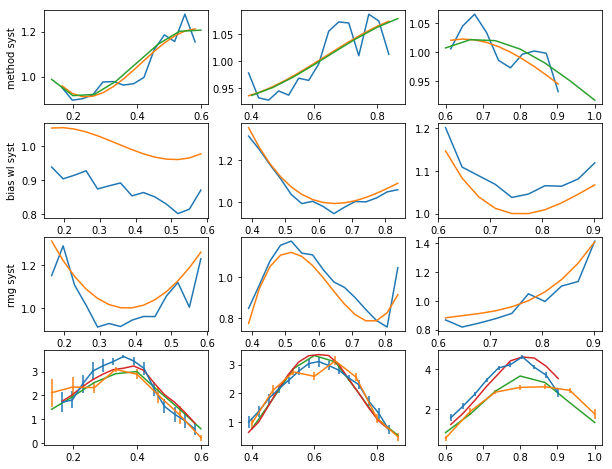

In [10]:
from magnification_mcmc import *
from scipy.stats import norm,multivariate_normal

fig, ax = plt.subplots(4,3, figsize=(10,8))
order = 3

# add flat prior for alpha and beta option ************************


def yfit(xx,mute,order): 
    if order ==5:
        y_fit_mean =1.+mute[-2]*xx+mute[-3]*xx**2+mute[-4]*xx**3 +mute[-5]*xx**4 +mute[-6]*xx**5 


    if order ==3:
        
        y_fit_mean = 1.+mute[-2]*xx+mute[-3]*xx**2+mute[-4]*xx**3 

    if order ==2:
        y_fit_mean = 1.+mute[-2]*xx+mute[-3]*xx**2#+mute[-4]*xx**3 
    if order ==1:
        y_fit_mean = 1.+mute[-2]*xx#+mute[-3]*xx**2+mute[-4]*xx**3 
    return y_fit_mean
    
    
    
final_wz = dict()
for i in range(3):
    
    x =systematics[0][i]['w_br_bl']['z_ref'][systematics[0][i]['w_br_bl']['mask']]
    dx = systematics[0][i]['w_br_bl']['dz']
    dx_n = systematics[0][i]['w_br_bl']['dz_n']
    yfs = np.zeros((len(dx),1000))
    yfs_n = np.zeros((len(systematics[0][i]['w_br_bl']['z_ref']),1000))
    try:
    #if 1==1:
        x_eboss =systematics_eboss[0][i]['w_br_bl']['z_ref'][systematics_eboss[0][i]['w_br_bl']['mask']]
        dx_eboss = systematics_eboss[0][i]['w_br_bl']['dz']
        dx_eboss_n = systematics_eboss[0][i]['w_br_bl']['dz_n']
        yfs_eboss = np.zeros((len(dx_eboss),1000))
        yfs_eboss_n = np.zeros((len(systematics_eboss[0][i]['w_br_bl']['z_ref']),1000))
    except:
        pass
    
    dy=systematics[0][i]['w_br_bl']['truth']/systematics[0][i]['w_br_bl']['final']
    
    
    
    mute = polyfit_with_fixed_points(order, dx,dy,  [(x-dx)[0]],([1]))[::-1]
    
    cov_syst = np.zeros((len(mute),len(mute)))
    for j in range(len(mute)):
        cov_syst[j,j] = mute[j]**2
    vals = np.random.multivariate_normal(np.zeros(len(mute)),cov_syst,1000).T
    
    for k in range(1000):
        yfs[:,k] = yfit(dx,vals[:,k],order)#/np.trapz(yfit(dx,vals[:,k],order),dx)
        yfs_n[:,k] = yfit(dx_n,vals[:,k],order)
        try:
            yfs_eboss[:,k] = yfit(dx_eboss,vals[:,k],order)#/np.trapz(yfit(dx,vals[:,k],order),dx)
            yfs_eboss_n[:,k] = yfit(dx_eboss_n,vals[:,k],order)#/np.trapz(yfit(dx,vals[:,k],order),dx)
        except:
            pass
        
    ax[0,i].plot(x,dy)
    yf = yfit(dx,mute,order)
    
    ax[0,i].plot(x,yf)
    try:
        yf_eboss = yfit(dx_eboss,mute,order)
        ax[0,i].plot(x_eboss,yf_eboss)
    except:
        pass
    ax[0,0].set_ylabel("method syst")
    
    
    # ********************************************************************
    bias
    x =systematics[0][i]['w_br_bl']['z_ref'][systematics[0][i]['w_br_bl']['mask']]
    #mute_dict['bias_wl'] = bias_wl[mm['mask'],0] 
    dy= systematics[0][i]['bias_wl']
    dx = systematics[0][i]['w_br_bl']['dz']
    mute1 = np.polyfit(dx,dy,order)
    ax[1,i].plot(x,dy)
    yf = yfit(dx,mute1,order)
    ax[1,i].plot(x,yf)
    ax[1,0].set_ylabel("bias wl syst")
    
    cov_syst = np.zeros((len(mute),len(mute)))
    for j in range(len(mute)):
        cov_syst[j,j] = mute1[j]**2
    vals = np.random.multivariate_normal(np.ones(len(mute)),cov_syst,1000).T
    
    for k in range(1000):
        yfs[:,k] *= yfit(dx,vals[:,k],order)                    
        yfs_eboss[:,k] *= yfit(dx_eboss,vals[:,k],order)
        yfs_n[:,k] *= yfit(dx_n,vals[:,k],order)            
        yfs_eboss_n[:,k] *= yfit(dx_eboss_n,vals[:,k],order)
                              
    # ***********************************************************************
                        
    x =systematics[0][i]['w_br_bl']['z_ref'][systematics[0][i]['w_br_bl']['mask']]
    dy=systematics[0][i]['w_br']['final']/systematics[1][i]['w_br']['final']
    dx = systematics[0][i]['w_br_bl']['dz']
    mute2 = np.polyfit(dx,dy,order)
    ax[2,i].plot(x,dy)
    yf = yfit(dx,mute2,order)
    ax[2,i].plot(x,yf)
    ax[2,0].set_ylabel("rmg syst")
    
    
    cov_syst = np.zeros((len(mute),len(mute)))
    for j in range(len(mute)):
        cov_syst[j,j] = mute2[j]**2
    vals = np.random.multivariate_normal(np.zeros(len(mute)),cov_syst,1000).T
    
    #for k in range(1000):
    #    yfs[:,k] *= yfit(dx,vals[:,k],order)
    #    yfs_n[:,k] *= yfit(dx_n,vals[:,k],order)
    yfs2 = copy.copy(yfs)
    for k in range(1000):
        yfs[:,k] = yfs[:,k]*systematics[1][i]['w_br']['final']/np.trapz(yfs[:,k]*systematics[1][i]['w_br']['final'],dx)         
        yfs_eboss[:,k] = yfs_eboss[:,k]*systematics_eboss[0][i]['w_br']['final']/np.trapz(yfs_eboss[:,k]*systematics_eboss[0][i]['w_br']['final'],dx_eboss)         
        
        #except:
        #    pass
    cov = covariance_jck(yfs,1000,'bootstrap')
    cov_eboss = covariance_jck(yfs_eboss,1000,'bootstrap')
    ax[3,i].errorbar(x,systematics[1][i]['w_br']['final'], cov['err'])
    ax[3,i].errorbar(x_eboss,systematics_eboss[0][i]['w_br']['final'], cov_eboss['err'])
    ax[3,i].plot(x_eboss,systematics_eboss[0][i]['w_br']['truth'])
    ax[3,i].plot(x,systematics[1][i]['w_br']['truth'])
   
    final_wz[i] = {'z':x,
                   'z_eboss':x_eboss,
                   'mask':systematics[1][i]['w_br']['mask'],
                   'mask_eboss':systematics_eboss[0][i]['w_br']['mask'],
                   'y':systematics[1][i]['w_br']['final'],
                   'y_eboss':systematics_eboss[0][i]['w_br']['final'],
                   'y_cov':covariance_jck(systematics[0][i]['w_br']['final_jck'],n_jck,"jackknife"),
                   'y_eboss_cov':covariance_jck(systematics_eboss[0][i]['w_br']['final_jck'],n_jck,"jackknife"),
                   't':systematics[1][i]['w_br']['truth'],
                   't_eboss':systematics_eboss[0][i]['w_br']['truth'],
                   'cov':cov,
                   'cov_eboss':cov_eboss,
                   'rel':yfs,
                   'rel_eboss':yfs_eboss,
                    'yfs_eboss_n':yfs_eboss_n,
                    "yfs_n":yfs_n,"yfs_n2":yfs2
                  }

In [12]:
def auto_fill_conf1(data,maskz,binx,method ="mean"):
        
        conf = dict()
        conf["method"] = method
        conf["alpha"] = 0.#fmag(save_all_eboss['info']['z_ref'][maskz])
        conf["e_alpha"] = 0.2
        conf["zrmg"] = data['info']['z_ref'][maskz]
        data_vect = copy.copy(data['runs'][0])
        conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
        conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/data['b_wl'][binx,maskz,])
        conf["bias_rmg"] = compute_bias(data_vect["bz"],data['auto_theory'],binx)[maskz,:]
        conf["bias_wl"] = compute_bias(data['b_wl'],data['auto_theory'],binx)[maskz,:]
        conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

        conf["mag_hyperrank1"] = [data['mag_pos'][binx,maskz]]
        conf["mag_hyperrank2"] = [data['mag_pos1'][binx,maskz]]
        conf["n_jck"] = data['n_jck']
        return conf
    
    
def polyfit_with_fixed_points(n, x, y, xf, yf) :
    mat = np.empty((n + 1 + len(xf),) * 2)
    vec = np.empty((n + 1 + len(xf),))
    x_n = x**np.arange(2 * n + 1)[:, None]
    yx_n = np.sum(x_n[:n + 1] * y, axis=1)
    x_n = np.sum(x_n, axis=1)
    idx = np.arange(n + 1) + np.arange(n + 1)[:, None]
    mat[:n + 1, :n + 1] = np.take(x_n, idx)
    xf_n = xf**np.arange(n + 1)[:, None]
    mat[:n + 1, n + 1:] = xf_n / 2
    mat[n + 1:, :n + 1] = xf_n.T
    mat[n + 1:, n + 1:] = 0
    vec[:n + 1] = yx_n
    vec[n + 1:] = yf
    params = np.linalg.solve(mat, vec)
    return params[:n + 1]


In [113]:
nz=muthyp[1].data['BIN{0}'.format(j+1)]
z=muthyp[1].data['Z_MID']
muthyp[100].header

XTENSION= 'BINTABLE'           / binary table extension                         
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                   56 / length of dimension 1                          
NAXIS2  =                  400 / length of dimension 2                          
PCOUNT  =                    0 / number of group parameters                     
GCOUNT  =                    1 / number of groups                               
TFIELDS =                    7 / number of table fields                         
NZDATA  =                    T                                                  
EXTNAME = 'nz_sources_realisation_99'                                           
TTYPE1  = 'Z_LOW   '                                                            
TFORM1  = 'D       '                                                            
TTYPE2  = 'Z_MID   '        

# Fit

In [13]:
# load 
import pyfits as pf
muthyp = pf.open("./cosmosis/hyperrank1.fits")
muthyp0 = pf.open("./cosmosis/hyperrank_true.fits")

nrel = 300
z_ref = systematics[0][0]['w_br']['z_ref']
Nz_hyp = np.zeros((4,nrel,len(z_ref)))
Nz_hyp_eboss = np.zeros((4,nrel,len(systematics_eboss[0][0]['w_br']['z_ref'])))
Nz_hyp_dz = np.zeros((4,nrel,len(z_ref)))
Nz_hyp_eboss_dz = np.zeros((4,nrel,len(systematics_eboss[0][0]['w_br']['z_ref'])))

Nz_hyp_dz_n = np.zeros((4,nrel,len(z_ref)))
Nz_hyp_dz_large = np.zeros((4,nrel,len(z_ref)))

Nz_hyp_eboss_dz_n = np.zeros((4,nrel,len(systematics_eboss[0][0]['w_br']['z_ref'])))
true_hip = np.zeros((4,len(systematics[0][0]['w_br']['z_ref'])))
z_ref_large = np.linspace(systematics_eboss[0][0]['w_br']['z_ref'][0],systematics_eboss[0][0]['w_br']['z_ref'][-1],len(z_ref))
meana = np.zeros((4,nrel))


for i in range(nrel):
    
    for j in range(3):
        dzzz = 0.+(np.random.randint(1000)*1.-500.)/1000.*0.08
        nz=muthyp0[1].data['BIN{0}'.format(j+1)]
        z=muthyp0[1].data['Z_MID']
        f = interp1d(z,nz)
        true_hip[j,:] = f(z_ref_large)
for i in range(nrel):
    
    for j in range(3):
        dzzz = 0.+(np.random.randint(1000)*1.-500.)/1000.*0.08
        nz=muthyp[i+1].data['BIN{0}'.format(j+1)]
        z=muthyp[i+1].data['Z_MID']
        f = interp1d(z,nz)
        m = (1.*np.random.randint(0,100,len(z_ref ))/100.-0.5)
        m[m<=0.]=1.
        m[m!=1]*=5
        nzw = f(systematics[0][0]['w_br']['z_ref'])#*m
        #meana[j,i] = (np.trapz(nzw*z_ref,z_ref)/np.trapz(nzw,z_ref))
        Nz_hyp[j,i,np.array(final_wz[j]['mask'])]=nzw[np.array(final_wz[j]['mask'])]/np.trapz(nzw[np.array(final_wz[j]['mask'])],final_wz[j]['z'])
        nzw = f(systematics[0][0]['w_br']['z_ref']+dzzz )#*m
        Nz_hyp_dz[j,i,np.array(final_wz[j]['mask'])]=nzw[np.array(final_wz[j]['mask'])]/np.trapz(nzw[np.array(final_wz[j]['mask'])],final_wz[j]['z'])
        
        Nz_hyp_dz_n[j,i,:]=nzw
        
        Nz_hyp_dz_large[j,i,:]=f(z_ref_large+dzzz )
        
        nzw = f(systematics_eboss[0][0]['w_br']['z_ref'])
        Nz_hyp_eboss[j,i,np.array(final_wz[j]['mask_eboss'])]=nzw[np.array(final_wz[j]['mask_eboss'])]/np.trapz(nzw[np.array(final_wz[j]['mask_eboss'])],final_wz[j]['z_eboss'])
        nzw = f(systematics_eboss[0][0]['w_br']['z_ref']+dzzz)
        Nz_hyp_eboss_dz[j,i,np.array(final_wz[j]['mask_eboss'])]=nzw[np.array(final_wz[j]['mask_eboss'])]/np.trapz(nzw[np.array(final_wz[j]['mask_eboss'])],final_wz[j]['z_eboss'])
        Nz_hyp_eboss_dz_n[j,i,:]=nzw
for j in range(3):
    ix = np.argsort(np.array(meana[j,:]))
    Nz_hyp[j,ix,:]=Nz_hyp[j,:,:]
    Nz_hyp_eboss[j,ix,:]=Nz_hyp_eboss[j,:,:]
   
print "done"

done


In [25]:

z_ref_large

array([0.13333333, 0.17222222, 0.21111111, 0.25      , 0.28888889,
       0.32777778, 0.36666667, 0.40555556, 0.44444444, 0.48333333,
       0.52222222, 0.56111111, 0.6       , 0.63888889, 0.67777778,
       0.71666667, 0.75555556, 0.79444444, 0.83333333, 0.87222222,
       0.91111111, 0.95      , 0.98888889, 1.02777778, 1.06666667])

# mean

NameError: name 'auto_fill_conf1' is not defined

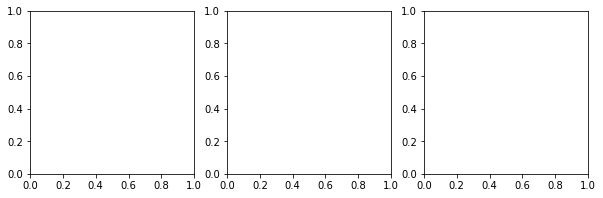

In [11]:
import copy
fig, ax = plt.subplots(1,3, figsize=(10,3))


for binx in range(3):

    data1 = copy.copy(save_all)
    try:
        data2 = copy.copy(save_all_eboss)
    except:
        pass
    # 2 sigma criteria **********************
    
    maskz1 = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91) & final_wz[binx]['mask']
    z_ref1 = data1['info']['z_ref']
   
    maskz2 = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1) & final_wz[binx]['mask_eboss']
    z_ref2 = data2['info']['z_ref']
        
    maskz1_large = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91)
    z_ref1_large = data1['info']['z_ref']
   
    maskz2_large = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1)
    z_ref2_large = data2['info']['z_ref']
    
        
        

    # *********************************************************
    conf1 = auto_fill_conf1(data1,maskz1,binx,method ="mean")
    conf2 = auto_fill_conf1(data2,maskz2,binx,method ="mean")
    
    #conf["nz_hyperrank"] = np.array([save_all['true_binned'][binx][maskz]]).T
    conf1["nz_hyperrank"] = Nz_hyp_dz[binx,:,maskz1].T
    conf1["n_realisations"] = len(conf1["nz_hyperrank"] )
    conf2["nz_hyperrank"] = Nz_hyp_eboss_dz[binx,:,maskz2].T
    conf2["n_realisations"] = len(conf2["nz_hyperrank"] )
    


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf1["priors"]=conf2["priors"]=priors

    conf1['sys_m'] = mean_syst[binx]
    conf2['sys_m'] = mean_syst_eboss[binx]+mean_stat_eboss[binx]
    

    w_rm = np.zeros(conf1["n_realisations"])
   
    w_eb = np.zeros(conf1["n_realisations"])
   
    w_combo = np.zeros(conf1["n_realisations"])
  
    for nn in range(conf1["n_realisations"]):
        ww1=compute_mean(conf1["zrmg"],conf1["nz_hyperrank"][nn,:])-compute_mean(conf1["zrmg"],final_wz[binx]['y'])
        w_rm[nn]=((norm.pdf(0.,ww1,conf1['sys_m'])))
        ww2=compute_mean(conf2["zrmg"],conf2["nz_hyperrank"][nn,:])-compute_mean(conf2["zrmg"],final_wz[binx]['y_eboss'])
        w_eb[nn]=((norm.pdf(0.,ww2,conf2['sys_m'])))
        w_combo[nn]=multivariate_normal.pdf(np.zeros(2),np.array([ww1,ww2]),cov_mean[binx])
            
    #try:
    if 1==1:   
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=np.ones(len(w_rm)))
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$',color='yellow')
        
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=w_rm*300.)
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated rm]',color='dodgerblue')
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=w_combo*300.)
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated rm + eboss]',color='red')
  



        #cov = covariance_jck_w(conf["nz_hyperrank"].T,nrel,"bootstrap",w=np.ones(len(w)))
    
        #ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask_eboss'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.15,label=r'N$_{\rm SOMPZ}$',color='forestgreen')
  
        #ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black', linestyle='dashed')
        
        
        
        ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ} [rmg]$',color='brown',fmt='o',markerfacecolor='None')
        zb = final_wz[binx]['z_eboss']
        faa =interp1d(zb,final_wz[binx]['y_eboss'])
        za = final_wz[binx]['z']
        norm_ratio = (np.trapz(final_wz[binx]['y'],final_wz[binx]['z'])/np.trapz(faa(za[za>zb[0]]),za[za>zb[0]]))
        
        ax[binx].errorbar(final_wz[binx]['z_eboss'],norm_ratio*final_wz[binx]['y_eboss'],norm_ratio*final_wz[binx]['y_eboss_cov']['err'],label=r'N$_{\rm WZ} [eboss]$',color='violet',fmt='o',markerfacecolor='None')
        ax[binx].plot(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'],color='black',linestyle='dashed')
        
        
        
        dee =covariance_scalar_jck(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,"bootstrap")                      
        print "SOMPZ: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])

        
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_rm*300.)                     
        print "SOMPZ calib rm: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_eb*300.)                     
        print "SOMPZ calib eboss: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_combo*300.)                     
        print "SOMPZ calib combo: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])

        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['y'])                     
        print "WZ rmg: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst[binx])#dee["err"])
        dee =compute_mean(z_ref2[np.array(final_wz[binx]['mask_eboss'])],final_wz[binx]['y_eboss'])                     
        print "WZ eboss: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst_eboss[binx])#dee["err"])

        
        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'])                    
        print "True: {0:2.3f}".format(dee)
        print "\n\n"


    
    
    ax[binx].set_xlabel("z",size=16)
ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on $\langle z \rangle$], [EBOSS]",size=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.25),
          ncol=3,  fontsize=16)
  
    
plt.savefig("./figures/comb_mean.pdf",bbox_inches="tight")
    
plt.show()



# shape

SOMPZ: 0.624 +- 0.033
SOMPZ calib rm: 0.615 +- 0.002
SOMPZ calib eboss: 0.612 +- 0.006
SOMPZ calib combo: 0.615 +- 0.002
WZ rmg: 0.612 +- 0.011
WZ eboss: 0.617 +- 0.012
True: 0.613





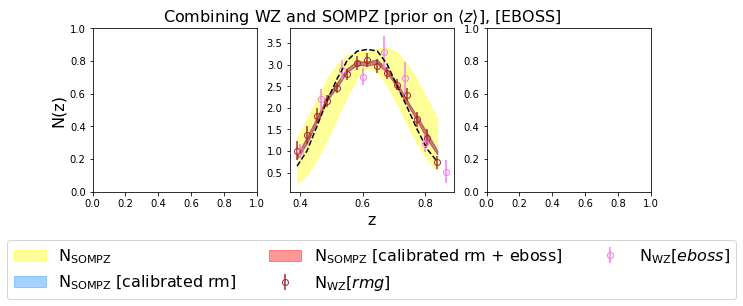

In [308]:
from scipy.stats import norm,multivariate_normal
import timeit
from multiprocessing import Pool
from contextlib import closing

fig, ax = plt.subplots(1,3, figsize=(10,3))


for binx in range(1,2):

    data1 = copy.copy(save_all)
    try:
        data2 = copy.copy(save_all_eboss)
    except:
        pass
    # 2 sigma criteria **********************
    
    maskz1 = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91) & final_wz[binx]['mask']
    z_ref1 = data1['info']['z_ref']
   
    maskz2 = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1) & final_wz[binx]['mask_eboss']
    z_ref2 = data2['info']['z_ref']
        
    maskz1_large = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91)
    z_ref1_large = data1['info']['z_ref']
   
    maskz2_large = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1)
    z_ref2_large = data2['info']['z_ref']
      
        
        

    # *********************************************************
    conf1 = auto_fill_conf1(data1,maskz1,binx,method ="mean")
    conf2 = auto_fill_conf1(data2,maskz2,binx,method ="mean")
    
    #conf["nz_hyperrank"] = np.array([save_all['true_binned'][binx][maskz]]).T
    conf1["nz_hyperrank"] = Nz_hyp_dz[binx,:,maskz1].T
    conf1["n_realisations"] = len(conf1["nz_hyperrank"] )
    conf2["nz_hyperrank"] = Nz_hyp_eboss_dz[binx,:,maskz2].T
    conf2["n_realisations"] = len(conf2["nz_hyperrank"] )
    


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf1["priors"]=conf2["priors"]=priors

    conf1['sys_m'] = mean_syst[binx]
    conf2['sys_m'] = mean_syst_eboss[binx]+mean_stat_eboss[binx]
    


    def read_file_rm(nn): 
        #if nn==1:
        w1 = multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['y'][:],np.diagflat(final_wz[binx]['cov']['cov'].diagonal())+np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal()))
            #print np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())) for o in range(1000)])
        #w2 = np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())) for o in range(1000)])
        
        return w1#,w2
    def read_file_eboss(nn):
        return multivariate_normal.pdf(conf2["nz_hyperrank"][nn,:],final_wz[binx]['y_eboss'][:],np.diagflat(final_wz[binx]['cov_eboss']['cov'].diagonal())+np.diagflat(final_wz[binx]['y_eboss_cov']['cov'].diagonal()))
        
        #return np.mean([multivariate_normal.pdf(conf2["nz_hyperrank"][nn,:],final_wz[binx]['rel_eboss'][:,o],np.diagflat(final_wz[binx]['y_eboss_cov']['cov'].diagonal())) for o in range(1000)])

    def read_file_combo(nn):     
        return np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal()))*multivariate_normal.pdf(conf2["nz_hyperrank"][nn,:],final_wz[binx]['rel_eboss'][:,o],np.diagflat(final_wz[binx]['y_eboss_cov']['cov'].diagonal())) for o in range(1000)])


    sims = range(conf1["n_realisations"])
    agents = conf1["n_realisations"]

    #read_file(0)

    w_rm = []
    with closing(Pool(processes=agents)) as pool:
        w_rm.append(pool.map(read_file_rm, sims))


    w_eboss = []
    with closing(Pool(processes=agents)) as pool:
        w_eboss.append(pool.map(read_file_eboss, sims))

    #w_combo = []
    #with closing(Pool(processes=agents)) as pool:
    #    w_combo.append(pool.map(read_file_combo, sims))
      
    w_rm=np.array(w_rm)[0]
    w_eb=np.array(w_eboss)[0]
    #w_combo=np.array(w_combo)[0]
    w_combo=w_rm*w_eb

    #try:
    if 1==1:   
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=np.ones(len(w_rm)))
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$',color='yellow')
        
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=w_rm*300.)
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated rm]',color='dodgerblue')
        cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=w_combo*300.)
        ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated rm + eboss]',color='red')
  



        #cov = covariance_jck_w(conf["nz_hyperrank"].T,nrel,"bootstrap",w=np.ones(len(w)))
    
        #ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask_eboss'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.15,label=r'N$_{\rm SOMPZ}$',color='forestgreen')
  
        #ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black', linestyle='dashed')
        
        ax[binx].plot(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'],color='black',linestyle='dashed')
        
        ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ} [rmg]$',color='brown',fmt='o',markerfacecolor='None')
        zb = final_wz[binx]['z_eboss']
        faa =interp1d(zb,final_wz[binx]['y_eboss'])
        za = final_wz[binx]['z']
        norm_ratio = (np.trapz(final_wz[binx]['y'],final_wz[binx]['z'])/np.trapz(faa(za[za>zb[0]]),za[za>zb[0]]))
        
        ax[binx].errorbar(final_wz[binx]['z_eboss'],norm_ratio*final_wz[binx]['y_eboss'],norm_ratio*final_wz[binx]['y_eboss_cov']['err'],label=r'N$_{\rm WZ} [eboss]$',color='violet',fmt='o',markerfacecolor='None')
        
        
        
        dee =covariance_scalar_jck(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,"bootstrap")                      
        print "SOMPZ: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])

        
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_rm*300.)                     
        print "SOMPZ calib rm: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_eb)                     
        print "SOMPZ calib eboss: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_combo)                     
        print "SOMPZ calib combo: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])

        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['y'])                     
        print "WZ rmg: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst[binx])#dee["err"])
        dee =compute_mean(z_ref2[np.array(final_wz[binx]['mask_eboss'])],final_wz[binx]['y_eboss'])                     
        print "WZ eboss: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst_eboss[binx])#dee["err"])

        
        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'])                    
        print "True: {0:2.3f}".format(dee)
        print "\n\n"


    
    
    ax[binx].set_xlabel("z",size=16)
ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on $\langle z \rangle$], [EBOSS]",size=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.25),
          ncol=3,  fontsize=16)
  
    
plt.savefig("./figures/comb_mean.pdf",bbox_inches="tight")
    
plt.show()



290
960
271851217.8915032


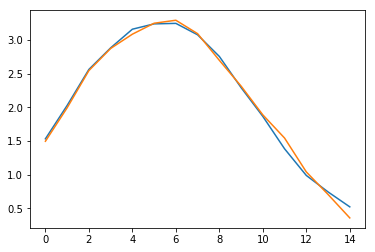

0.0


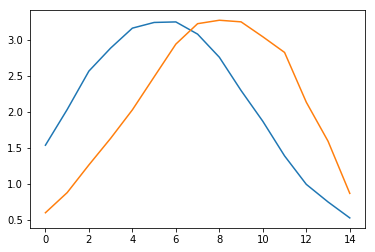

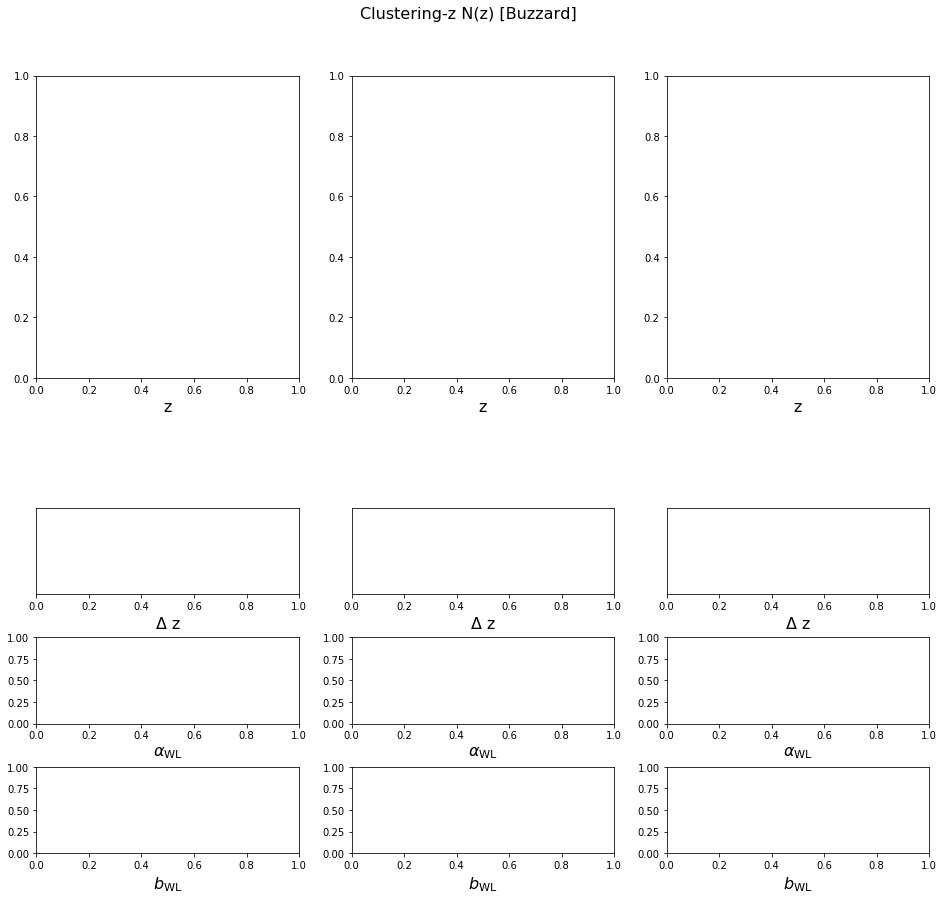

In [63]:
fig = plt.figure(figsize=(16,12))
fig.suptitle("Clustering-z N(z) [Buzzard]",size=16)

gs = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.45],top=0.9, bottom=0.55, hspace=0.)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.set_xlabel("z",size=16)
ax2.set_xlabel("z",size=16)
ax3.set_xlabel("z",size=16)

gs = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.15],top=0.4, bottom=0.3, hspace=0.)


    
aax1 = fig.add_subplot(gs[0])
aax2 = fig.add_subplot(gs[1])
aax3 = fig.add_subplot(gs[2])

aax1.set_yticks([])
aax2.set_yticks([])
aax3.set_yticks([])

aax1.set_xlabel("$\Delta$ z",size=16)
aax2.set_xlabel("$\Delta$ z",size=16)
aax3.set_xlabel("$\Delta$ z",size=16)

gs1 = GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[0.15],top=0.25, bottom=0.15, hspace=0.1)

ax4 = fig.add_subplot(gs1[0])
ax5 = fig.add_subplot(gs1[1])
ax6 = fig.add_subplot(gs1[2])



gs2 = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.15],top=0.1, bottom=0.0, hspace=0.1)

ax7 = fig.add_subplot(gs2[0])
ax8 = fig.add_subplot(gs2[1])
ax9 = fig.add_subplot(gs2[2])

ax7.set_xlabel(r"$b_{\rm WL}$",size=16)
ax8.set_xlabel(r"$b_{\rm WL}$",size=16)
ax9.set_xlabel(r"$b_{\rm WL}$",size=16)

ax4.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax5.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax6.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax = np.array([[ax1,ax2,ax3],[aax1,aax2,aax3],[ax4,ax5,ax6],[ax7,ax8,ax9]])


# shapes with mag

True: 0.358
SOMPZ: 0.368 +- 0.025
SOMPZ calib rm: 0.353 +- 0.010
SOMPZ calib eboss: 0.347 +- 0.013
SOMPZ calib rm + eboss: 0.349 +- 0.009
WZ rmg: 0.348 +- 0.010
WZ rmg [calib + marginalised]: 0.348 +- 0.013



True: 0.613
SOMPZ: 0.625 +- 0.036
SOMPZ calib rm: 0.610 +- 0.011
SOMPZ calib eboss: 0.613 +- 0.014
SOMPZ calib rm + eboss: 0.611 +- 0.009
WZ rmg: 0.612 +- 0.011
WZ rmg [calib + marginalised]: 0.612 +- 0.016



True: 0.784
SOMPZ: 0.786 +- 0.020
SOMPZ calib rm: 0.775 +- 0.011
SOMPZ calib eboss: 0.789 +- 0.010
SOMPZ calib rm + eboss: 0.782 +- 0.007
WZ rmg: 0.774 +- 0.012
WZ rmg [calib + marginalised]: 0.774 +- 0.014





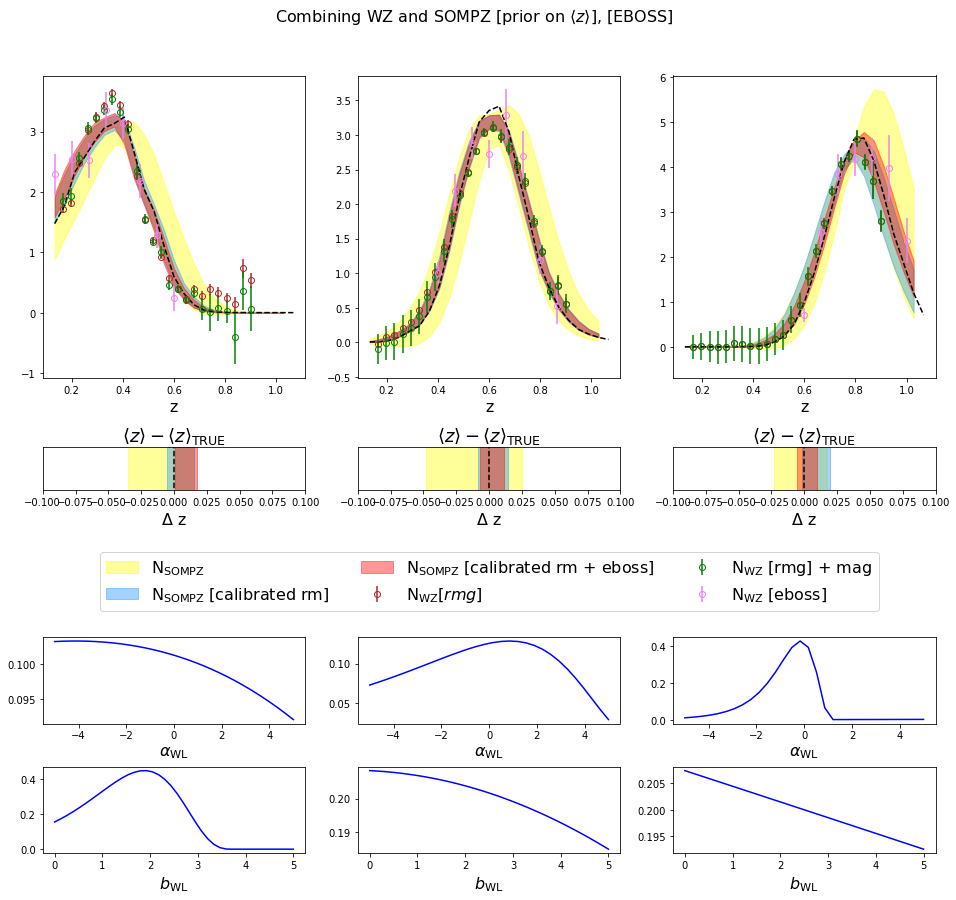

In [14]:
from scipy.stats import norm,multivariate_normal
import timeit
from multiprocessing import Pool
from contextlib import closing

fig = plt.figure(figsize=(16,12))
fig.suptitle("Clustering-z N(z) [Buzzard]",size=16)

gs = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.45],top=0.9, bottom=0.55, hspace=0.)
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
ax3 = fig.add_subplot(gs[2])

ax1.set_xlabel("z",size=16)
ax2.set_xlabel("z",size=16)
ax3.set_xlabel("z",size=16)

gs = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.15],top=0.47, bottom=0.42, hspace=0.)


    
aax1 = fig.add_subplot(gs[0])
aax2 = fig.add_subplot(gs[1])
aax3 = fig.add_subplot(gs[2])

aax1.set_yticks([])
aax2.set_yticks([])
aax3.set_yticks([])

aax1.set_xlabel("$\Delta$ z",size=16)
aax2.set_xlabel("$\Delta$ z",size=16)
aax3.set_xlabel("$\Delta$ z",size=16)

gs1 = GridSpec(1, 3, width_ratios=[1,1,1], height_ratios=[0.15],top=0.25, bottom=0.15, hspace=0.1)

ax4 = fig.add_subplot(gs1[0])
ax5 = fig.add_subplot(gs1[1])
ax6 = fig.add_subplot(gs1[2])



gs2 = GridSpec(1, 3, width_ratios=[1, 1,1], height_ratios=[0.15],top=0.1, bottom=0.0, hspace=0.1)

ax7 = fig.add_subplot(gs2[0])
ax8 = fig.add_subplot(gs2[1])
ax9 = fig.add_subplot(gs2[2])

ax7.set_xlabel(r"$b_{\rm WL}$",size=16)
ax8.set_xlabel(r"$b_{\rm WL}$",size=16)
ax9.set_xlabel(r"$b_{\rm WL}$",size=16)

ax4.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax5.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax6.set_xlabel(r"$\alpha_{\rm WL}$",size=16)
ax = np.array([[ax1,ax2,ax3],[aax1,aax2,aax3],[ax4,ax5,ax6],[ax7,ax8,ax9]])

run_k=1

for binx in range(1):

    data1 = copy.copy(save_all)
    try:
        data2 = copy.copy(save_all_eboss)
    except:
        pass
    # 2 sigma criteria **********************
    
    maskz1 = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91) & final_wz[binx]['mask']
    z_ref1 = data1['info']['z_ref']
   
    maskz2 = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1) & final_wz[binx]['mask_eboss']
    z_ref2 = data2['info']['z_ref']
        
    maskz1_large = ( data1['info']['z_ref']>0.1) & ( data1['info']['z_ref']<0.91)
    z_ref1_large = data1['info']['z_ref']
   
    maskz2_large = ( data2['info']['z_ref']>0.1) & ( data2['info']['z_ref']<1.1)
    z_ref2_large = data2['info']['z_ref']

        

    # *********************************************************
    conf1 = auto_fill_conf1(data1,maskz1,binx,method ="mean")
    conf2 = auto_fill_conf1(data2,maskz2,binx,method ="mean")
    
    #conf["nz_hyperrank"] = np.array([save_all['true_binned'][binx][maskz]]).T
    conf1["nz_hyperrank"] = Nz_hyp_dz_n[binx,:,maskz1_large].T
    conf1["nz_hyperrank_large"] = Nz_hyp_dz_large[binx,:,maskz1_large].T
    
    conf1["n_realisations"] = len(conf1["nz_hyperrank"] )

    
    for nn in range(conf1["n_realisations"]):
        norm1 = np.trapz(conf1["nz_hyperrank"][nn,:][maskz1[maskz1_large]],z_ref1[maskz1])
        conf1["nz_hyperrank"][nn,:]=conf1["nz_hyperrank"][nn,:]/norm1
        
        
        
        
        zb = z_ref_large[maskz1_large]
        faa =interp1d(zb,conf1["nz_hyperrank_large"][nn,:])
        za = z_ref1[maskz1]
        
        norm_ratio = 1./np.trapz(faa(za[za>zb[0]]),za[za>zb[0]])
        
        
        norm1 = norm_ratio#*np.trapz(conf1["nz_hyperrank_large"][nn,:][maskz1[maskz1_large]],z_ref_large[maskz1])
        conf1["nz_hyperrank_large"][nn,:]=conf1["nz_hyperrank_large"][nn,:]*norm1
    
    
    conf2["nz_hyperrank"] = Nz_hyp_eboss_dz_n[binx,:,maskz2_large].T
    conf2["n_realisations"] = len(conf2["nz_hyperrank"] )
    for nn in range(conf2["n_realisations"]):
        norm1 = np.trapz(conf2["nz_hyperrank"][nn,:][maskz2[maskz2_large]],z_ref2[maskz2])
        conf2["nz_hyperrank"][nn,:]=conf2["nz_hyperrank"][nn,:]/norm1


    zb = z_ref_large[maskz1_large]
    faa =interp1d(zb,true_hip[binx,maskz1_large])
    za = z_ref1[maskz1]

    norm_ratio = 1./np.trapz(faa(za[za>zb[0]]),za[za>zb[0]])
    norm1 = norm_ratio#*np.trapz(conf1["nz_hyperrank_large"][nn,:][maskz1[maskz1_large]],z_ref_large[maskz1])
    tt=true_hip[binx,:]*norm1

        
    #conf["nz_hyperrank"] = np.array([save_all['true_binned'][binx][maskz]]).T
    conf1["nz_hyperrank_mean"] = Nz_hyp_dz[binx,:,maskz1].T
    conf2["nz_hyperrank_mean"] = Nz_hyp_eboss_dz[binx,:,maskz2].T
    


        
        
    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf1["priors"]=conf2["priors"]=priors

    conf1['sys_m'] = mean_syst[binx]
    conf2['sys_m'] = mean_syst_eboss[binx]+mean_stat_eboss[binx]
    


    def read_file_rm(nn):  
        
        # cycle over alpha, b_wl and systematics + normalise at each step
        
        run_k=1
        mvof = mvo[run_k][binx]['mvm'][:,:,maskz1_large]
        minb = 0
        maxb= 25
        #w = [[[multivariate_normal.pdf(conf1["nz_hyperrank"][nn,minb:maxb],
        #((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]),
        #np.diagflat(( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1]),z_ref1[maskz1])**2) 
        #for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] for o in range(1000)]
        
        awl_i,bwl_i=np.int(len(awl_a)*1./2.),np.int(len(bwl_a)*1./2.)
        
        w=[[(compute_std(z_ref1[maskz1_large],mvof[bwl_i,awl_i,:])-compute_std(z_ref1[maskz1_large],conf1["nz_hyperrank"][nn,:]))for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] 
        w=np.array(w)
        w[w!=w]=100.
        
        for ii in range(w.shape[0]):
            for jj in range(w.shape[1]):
                w[ii,jj] = norm.pdf(0.,w[ii,jj],0.03)#w_rm[nn]=((ww1,conf1['sys_m'])))

             
                
        w1=[[(compute_mean(z_ref1[maskz1],mvof[bwl_i,awl_i,maskz1[maskz1_large]])-compute_mean(z_ref1[maskz1],conf1["nz_hyperrank_mean"][nn,:]))for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] 
        #w1=[[(compute_mean(z_ref1[maskz1],mvof[10,10,maskz1[maskz1_large]])-compute_mean(z_ref1[maskz1],conf1["nz_hyperrank_mean"][nn,:]))for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] 
        

        w1=np.array(w1)
        w1[w1!=w1]=100.
        
        for ii in range(w.shape[0]):
            for jj in range(w.shape[1]):
                w1[ii,jj] = norm.pdf(0.,w1[ii,jj],conf1['sys_m'])#w_rm[nn]=((ww1,conf1['sys_m'])))

        
        w1=np.array(w1)*np.array(w)
        return w1
    
        #return  w

    
    def read_file_eboss(nn):  
        
        # cycle over alpha, b_wl and systematics + normalise at each step
        
        run_k=0
        mvof_eboss = mvo_eboss[run_k][binx]['mvm'][:,:,maskz2_large]
        minb = 0
        maxb= 25
    
        
        w=[[(compute_std(z_ref2[maskz2_large],mvof_eboss[bwl_i,awl_i,:])-compute_std(z_ref2[maskz2_large],conf2["nz_hyperrank"][nn,:]))for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] 
        w=np.array(w)
        w[w!=w]=100.
        
        for ii in range(w.shape[0]):
            for jj in range(w.shape[1]):
                w[ii,jj] = norm.pdf(0.,w[ii,jj],0.03)#w_rm[nn]=((ww1,conf1['sys_m'])))

                
         
        w1=[[(compute_mean(z_ref2[maskz2],mvof_eboss[bwl_i,awl_i,maskz2[maskz2_large]])-compute_mean(z_ref2[maskz2],conf2["nz_hyperrank_mean"][nn,:]))for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] 


        w1=np.array(w1)
        w1[w!=w]=100.
        
        for ii in range(w.shape[0]):
            for jj in range(w.shape[1]):
                w1[ii,jj] = norm.pdf(0.,w1[ii,jj],conf2['sys_m'])#w_rm[nn]=((ww1,conf1['sys_m'])))
        
        
        #w1=np.array(w1)*np.array(w)
        w1 = np.array(w)
        return w1
    
    
    def read_eboss_2(nn): 
        ww2=compute_mean(conf2["zrmg"],conf2["nz_hyperrank_mean"][nn,:])-compute_mean(conf2["zrmg"],final_wz[binx]['y_eboss'])
        return ((norm.pdf(0.,ww2,conf2['sys_m'])))
        
        
    def read_file_combo(nn):     
        return np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal()))*multivariate_normal.pdf(conf2["nz_hyperrank"][nn,:],final_wz[binx]['rel_eboss'][:,o],np.diagflat(final_wz[binx]['y_eboss_cov']['cov'].diagonal())) for o in range(1000)])


    sims = range(conf1["n_realisations"])
    agents = conf1["n_realisations"]

    #read_file(0)
    
    w_rm = []
    with closing(Pool(processes=agents)) as pool:
        w_rm.append(pool.map(read_file_rm, sims))
    w_rm1 = np.array(w_rm)  
    w_rm1[w_rm1!=w_rm1]=0.


    w_eboss = []
    with closing(Pool(processes=agents)) as pool:
        w_eboss.append(pool.map(read_eboss_2, sims))
    w_eboss1 = np.array(w_eboss)[0]  
    w_eboss1[w_eboss1!=w_eboss1]=0.
    w_combo1 =copy.copy(w_rm1)
    
    for kkk in range(conf1["n_realisations"]):
        
        w_combo1[0][kkk,:,:] *=  w_eboss1[kkk]
    
    
    if 1==1:   
        
        
        #    print best b_wl, a_wl values ***************************
        
        w_rm_m = np.mean(np.array(w_rm1)[0],axis=0)
        w_eboss=w_eboss1
        w_combo_m = np.mean(np.array(w_combo1)[0],axis=0)
        
        awl_post = np.mean(np.mean(np.array(w_rm1)[0],axis=0),axis=1)
        #ax[2,binx].plot(awl_a,awl_post/np.trapz(awl_post,awl_a), label = "[rmg]")
        
        
  
        awl_post = np.mean(np.mean(np.array(w_combo1)[0],axis=0),axis=1)
        ax[2,binx].plot(awl_a,awl_post/np.trapz(awl_post,awl_a), label = "[combo]",color='b')
        
        
        bwl_post = np.mean(np.mean(np.array(w_rm1)[0],axis=0),axis=0)
        #ax[3,binx].plot(bwl_a,bwl_post/np.trapz(bwl_post,bwl_a), label = "[rmg]")

        
        bwl_post = np.mean(np.mean(np.array(w_combo1)[0],axis=0),axis=0)
        ax[3,binx].plot(bwl_a,bwl_post/np.trapz(bwl_post,bwl_a), label = "[combo]",color='b')
        
        
        w_rm = np.mean(np.mean(np.array(w_rm1)[0],axis=2),axis=1)
        
        w_combo = np.mean(np.mean(np.array(w_combo1)[0],axis=2),axis=1)

        c1 = 'yellow'
        c2='dodgerblue'
        c3='green'
        cc1='brown'
        cc2='red'
        a1=0.4
        a2=0.4
        a3=0.4
        #   show  sompz best    ***************************************
        cov = covariance_jck_w(conf1["nz_hyperrank_large"].T,nrel,"bootstrap",w=np.ones(len(w_rm)))
        ax[0,binx].fill_between(z_ref_large[maskz1_large],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=a1,label=r'N$_{\rm SOMPZ}$',color=c1)
        
        cov = covariance_jck_w(conf1["nz_hyperrank_large"].T,nrel,"bootstrap",w=w_rm*300.)
        ax[0,binx].fill_between(z_ref_large[maskz1_large],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=a2,label=r'N$_{\rm SOMPZ}$ [calibrated rm]',color=c2)
        #cov = covariance_jck_w(conf1["nz_hyperrank"].T,nrel,"bootstrap",w=w_combo*300.)
        #ax[0,binx].fill_between(z_ref[maskz1_large],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated rm + eboss]',color='red')
  

        # original WZ ********************
        minb = 0
        maxb= 25
        mvof = mvo[run_k][binx]['mvm'][:,:,maskz1_large]
        
        cov = np.diagflat(( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1]),z_ref1[maskz1])**2
        
        awl_i = np.argmin(awl_a**2)
        bwl_i = np.argmin(bwl_a**2)
        yy= ((mvof[bwl_i,awl_i,:]))/np.trapz(((mvof[bwl_i,awl_i,:]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]) 

        ax[0,binx].errorbar(z_ref1[maskz1_large],yy,np.sqrt(cov.diagonal()),label=r'N$_{\rm WZ} [rmg] $',color=cc1,fmt='o',markerfacecolor='None')
   
        # show clustering z full **********************************
        bwl_i = np.argmax(bwl_post)
        awl_i = np.argmax(awl_post)

        yy= ((mvof[bwl_i,awl_i,:]))/np.trapz(((mvof[bwl_i,awl_i,:]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]) 

        
        
        
        # best fit WZ ***********************************************
        awl_i,bwl_i=np.int(len(awl_a)*1./2.),np.int(len(bwl_a)*1./2.)
        #cov = np.diagflat(( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1]),z_ref1[maskz1])**2
        

        yff = [[((mvof[bwl_i,awl_i,:]))/np.trapz(((mvof[bwl_i,awl_i,:]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]) for awl_i in range(len(awl_a))] for bwl_i in range(len(bwl_a))] 
        yff = np.array(yff).reshape(len(bwl_a)*len(awl_a),len(maskz1[maskz1_large]))
        w_rm_m=w_rm_m.reshape(len(bwl_a)*len(awl_a))
        cov1 = covariance_jck_w(np.array(yff).T,len(bwl_a)*len(awl_a),'bootstrap', w = w_rm_m)
        cov+=cov1["cov"]
        ax[0,binx].errorbar(z_ref1[maskz1_large],yy,np.sqrt(cov.diagonal()),label=r'N$_{\rm WZ}$ [rmg] + mag',color=cc2,fmt='o',markerfacecolor='None')
        


        # WZ EBOSS *********************************************************
        zb = final_wz[binx]['z_eboss']
        faa =interp1d(zb,final_wz[binx]['y_eboss'])
        za = final_wz[binx]['z']
        
        norm_ratio = (np.trapz(final_wz[binx]['y'],final_wz[binx]['z'])/np.trapz(faa(za[za>zb[0]]),za[za>zb[0]]))
        
        
        ax[0,binx].errorbar(final_wz[binx]['z_eboss'],norm_ratio*final_wz[binx]['y_eboss'],norm_ratio*final_wz[binx]['y_eboss_cov']['err'],label=r'N$_{\rm WZ}$ [eboss]',color='violet',fmt='o',markerfacecolor='None')
    
        cov = covariance_jck_w(conf1["nz_hyperrank_large"].T,nrel,"bootstrap",w=w_combo*300.)

        ax[0,binx].fill_between(z_ref_large[maskz1_large],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=a3,label=r'N$_{\rm SOMPZ}$ [calibrated rm + eboss]',color=c3)
  
        # *******************************************************************
        ax[0,binx].plot(z_ref_large,tt,color='black',linestyle='dashed')
     
        #ax[0,binx].plot(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'],color='black',linestyle='dashed')
        #ax[0,binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ} [rmg]$',color='brown',fmt='o',markerfacecolor='None')
        
        
        """
        ax[0,binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ}$ [rmg]',color='brown',fmt='o',markerfacecolor='None')
        zb = final_wz[binx]['z_eboss']
        faa =interp1d(zb,final_wz[binx]['y_eboss'])
        za = final_wz[binx]['z']
        norm_ratio = (np.trapz(final_wz[binx]['y'],final_wz[binx]['z'])/np.trapz(faa(za[za>zb[0]]),za[za>zb[0]]))
        
        ax[0,binx].errorbar(final_wz[binx]['z_eboss'],norm_ratio*final_wz[binx]['y_eboss'],norm_ratio*final_wz[binx]['cov_eboss']['err'],label=r'N$_{\rm WZ} [eboss]$',color='violet',fmt='o',markerfacecolor='None')
        """
        
        det =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['t'])                    
        print "True: {0:2.3f}".format(det)
        dee =covariance_scalar_jck(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T[maskz1[maskz1_large],:]),300,"bootstrap")                      
        print "SOMPZ: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        
        ax[1,binx].axvspan((det-dee["mean"])-dee["err"],(det-dee["mean"])+dee["err"] , alpha = 0.4,color = "yellow")

        
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T[maskz1[maskz1_large],:]),300,type_c="bootstrap",w=w_rm*300.)                     
        print "SOMPZ calib rm: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        
        ax[1,binx].axvspan((det-dee["mean"])-dee["err"],(det-dee["mean"])+dee["err"] , alpha = 0.4,color = 'dodgerblue')

        
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T[maskz1[maskz1_large],:]),300,type_c="bootstrap",w=w_eboss*300.)                     
        print "SOMPZ calib eboss: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        
        dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T[maskz1[maskz1_large],:]),300,type_c="bootstrap",w=w_combo*300.)                     
        print "SOMPZ calib rm + eboss: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        
        ax[1,binx].axvspan((det-dee["mean"])-dee["err"],(det-dee["mean"])+dee["err"] , alpha = 0.4,color = "red")

        
        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['y'])                     
        print "WZ rmg: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst[binx])#dee["err"])
        dee1 =covariance_scalar_jck(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],yff[:,maskz1[maskz1_large]].T),300,"bootstrap")                      
        dee =compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],final_wz[binx]['y'])                     
        print "WZ rmg [calib + marginalised]: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst[binx]+dee1["err"])#dee["err"])
        
        
        
        ax[1,binx].plot([0.,0.],[-1,1],color='black',linestyle='dashed')
        ax[1,binx].set_xlim([-0.1,0.1])
        ax[1,binx].set_ylim([-0.5,0.5])
        
        
        #dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_eb)                     
        #print "SOMPZ calib eboss: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])
        #dee =covariance_scalar_jck_w(compute_mean(z_ref1[np.array(final_wz[binx]['mask'])],conf1["nz_hyperrank"].T),300,type_c="bootstrap",w=w_combo)                     
        #print "SOMPZ calib combo: {0:2.3f} +- {1:2.3f}".format(dee["mean"],dee["err"])

        #dee =compute_mean(z_ref2[np.array(final_wz[binx]['mask_eboss'])],final_wz[binx]['y_eboss'])                     
        #print "WZ eboss: {0:2.3f} +- {1:2.3f}".format(dee,mean_syst_eboss[binx])#dee["err"])

        
        print "\n\n"
        
ax[1,0].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
ax[1,1].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)
ax[1,2].set_title(r"$ \langle z \rangle- \langle z \rangle_{\rm TRUE}$", size=18)



#ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on $\langle z \rangle$], [EBOSS]",size=16)

ax[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.55),
          ncol=3,  fontsize=16)
plt.show()

In [56]:
z_ref_large/tt


array([1.99361700e+03, 5.42856520e+03, 2.36207612e+03, 2.22970322e+03,
       7.03039356e+02, 3.18438505e+02, 1.33006282e+02, 4.34576719e+01,
       1.44638815e+01, 4.58567742e+00, 2.20670663e+00, 1.10592204e+00,
       6.12393209e-01, 3.91532342e-01, 2.80007877e-01, 2.17644327e-01,
       1.84511107e-01, 1.72227536e-01, 1.79512234e-01, 2.10943203e-01,
       2.70199998e-01, 3.78080749e-01, 5.33413739e-01, 8.55491440e-01,
       1.50963637e+00])

In [51]:
true_hip    

array([8.18518519e+00, 3.88271605e+00, 1.09382716e+01, 1.37222222e+01,
       5.02901235e+01, 1.25975309e+02, 3.37388889e+02, 1.14212963e+03,
       3.76066049e+03, 1.28995556e+04, 2.89629136e+04, 6.20948889e+04,
       1.19909167e+05, 1.99705117e+05, 2.96243327e+05, 4.02996574e+05,
       5.01158833e+05, 5.64537043e+05, 5.68141093e+05, 5.06049630e+05,
       4.12683877e+05, 3.07518000e+05, 2.26889710e+05, 1.47033080e+05,
       8.64744630e+04])

In [ ]:
#w = [[[multivariate_normal.pdf(conf1["nz_hyperrank"][nn,minb:maxb],
#        ((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]),
#        np.diagflat(( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1][minb:maxb]),z_ref1[maskz1][minb:maxb])**2) 
#        for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] for o in range(1000)]
        #return np.mean(np.array(w)[:,0,0])
       
#w1 = np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())) for o in range(1000)])

o=3
i=0
minb,maxb=0,14
nn=20
w=[]
for o in range(1000):
    y1 = conf1["nz_hyperrank"][nn,minb:maxb]
    y3 = ((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb])
    y2 = ((mvof[awl_i,bwl_i,:]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb])

    #y2 = ((mvof[awl_i,bwl_i,:]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:])[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb])
    cov= np.diagflat((( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1]),z_ref1[maskz1])**2)
    #cov=np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())
    w.append(multivariate_normal.pdf(y1,y3,cov)) 
print np.mean(w)

array([4.03627153e-059, 4.71542138e-015, 9.04238466e-015, 8.49361379e-017,
       3.05419654e-062, 3.20146602e-048, 6.75548348e-062, 1.12971161e-070,
       2.67363357e-024, 1.91398445e-022, 9.08084127e-015, 2.84037951e-014,
       4.59295363e-066, 8.75053835e-061, 3.26677235e-023, 1.19091980e-044,
       4.29044377e-013, 3.66902134e-075, 2.52989625e-024, 8.26409783e-020,
       1.14238878e-021, 1.99270851e-017, 8.19001320e-023, 1.48791276e-165,
       9.44908336e-032, 4.46036238e-043, 4.54482256e-025, 1.46004032e-055,
       1.32453446e-008, 3.64750010e-007, 3.39828496e-020, 6.51570315e-044,
       2.31291808e-013, 2.33668698e-025, 1.60525752e-034, 6.68530020e-002,
       9.54653637e-108, 4.34920417e-139, 1.34328178e-021, 4.11822365e-022,
       8.00088696e-018, 1.01365448e-012, 9.26281181e-022, 1.47868312e-022,
       9.63961435e-019, 2.48352280e-002, 6.48768634e-060, 1.82339696e-017,
       6.85691838e-011, 1.72280455e-060, 1.77044992e-031, 8.46292730e-021,
       3.25049278e-004, 1

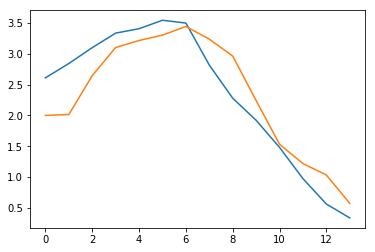

In [252]:
plt.plot(y1)
plt.plot(y3)
#np.mean([multivariate_normal.pdf(conf1["nz_hyperrank"][nn,:14],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())) for o in range(1000)])
minb,maxb=0,14
cov1= np.diagflat((( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1]),z_ref1[maskz1])**2)
    

w_rm

In [166]:
#np.array(cov.diagonal())
maxb=8
dd = ((mvo[run_k][binx]['cov'].diagonal())[maskz1_large])#[minb:maxb])/
normed = np.trapz((mvo[run_k][binx]['norm_cov'][maskz1_large][minb:maxb]),z_ref1[maskz1_large][minb:maxb])**2
print normed
normed = np.trapz((mvo[run_k][binx]['norm_cov'][:-2]),z_ref1[:-2])**2
print normed


0.000531077257610168
0.0014012088965409673


In [162]:
nn1 = np.trapz(((mvof[awl_i,bwl_i,:]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb])
normed


0.0012466305803340574

In [29]:
   # conf1["nz_hyperrank"] = Nz_hyp_dz[binx,:,maskz1].T

# w = [[[multivariate_normal.pdf(conf1["nz_hyperrank"][nn,minb:],
 #                                                           ((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:]
 #                                                           /np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:],z_ref1[maskz1]),np.diagflat(( final_wz[i]['yfs_n'][maskz1_large,o]**2*(mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:])
 #                                                           /np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:],z_ref1[maskz1])) for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] for o in range(1000)]
       
   

nn =250
print np.mean([multivariate_normal.pdf(Nz_hyp_dz[binx,:,maskz1].T[nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['y_cov']['cov'].diagonal())) for o in range(1000)])
minb = 14
print np.mean()
      

6.972125376512962e-93
3.953385206840784e-39


In [71]:
#final_wz[binx]['rel'][:,o]/(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:]/(np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:],z_ref1[maskz1])))

mvo[run_k][binx]['norm_cov'][maskz1]#[maskz1[maskz1_large]][minb:maxb]

array([0.06096186, 0.06436213, 0.08835606, 0.1078726 , 0.11572659,
       0.12211563, 0.1297134 , 0.12306491, 0.11314758, 0.08743988,
       0.05805615, 0.04415205, 0.03775269, 0.01718684])

In [72]:
        mvof = mvo[run_k][binx]['mvm'][:,:,maskz1_large]
        minb = 0
        maxb= 50
        
        w = [[[multivariate_normal.pdf(conf1["nz_hyperrank"][nn,minb:maxb],
        ((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[minb:maxb]/np.trapz(((mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o]))[maskz1[maskz1_large]][minb:maxb],z_ref1[maskz1_large][maskz1[maskz1_large]][minb:maxb]),
        np.diagflat(( (mvo[run_k][binx]['cov'].diagonal())[maskz1_large])[minb:maxb])/np.trapz((mvo[run_k][binx]['norm_cov'][maskz1][minb:maxb]),z_ref1[maskz1][minb:maxb])**2) 
        for bwl_i in range(len(bwl_a))] for awl_i in range(len(awl_a))] for o in range(1000)]
        

<ErrorbarContainer object of 3 artists>

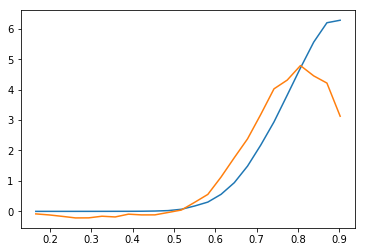

In [105]:
"""
w = np.zeros((mvof.shape[0],mvof.shape[1],1000))


w = []
for o in range(1000):
for awl_i in range(mvof.shape[0]):
for bwl_i in range(mvof.shape[1]):
"""
i=2
nn=20
mvof = mvo[run_k][i]['mvm'][:,:,maskz1_large]
yy=copy.copy(mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o])
norm2 = np.trapz(conf1["nz_hyperrank"][nn,:][maskz1[maskz1_large]],z_ref1[maskz1])
norm1 = np.trapz(yy[maskz1[maskz1_large]],z_ref1[maskz1])

plt.plot(z_ref1_large[maskz1_large],conf1["nz_hyperrank"][nn,:]/norm2)

plt.errorbar(z_ref1_large[maskz1_large],(yy)/norm1)#,np.sqrt(cov.diagonal()))

(24, 24)
[   6609   17323   42321   85861  155075  224342  368572  602284  929076
 1457987 1998366 2463738 2849221 3050723 3088777 3057558 2772280 2306068
 1854395 1381009  963577  697193  481352  326413  213097]


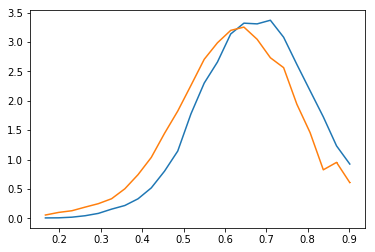

In [44]:
run_k = 1
i =1

#mask1 = (mvo[run_k][i]['z_ref']>mvo[run_k][i]['edges'][0]) & (mvo[0][0]['z_ref']<mvo[run_k][i]['edges'][1])

#mask = (mvo[run_k][i]['z_ref']>mvo[run_k][i]['edges'][0]) & (mvo[0][0]['z_ref']<mvo[run_k][i]['edges'][1])
cov = np.diagflat((mvo[run_k][i]['cov'].diagonal()[maskz1_large])) 
mvof = mvo[run_k][i]['mvm'][:,:,maskz1_large]
#plt.errorbar(z_ref1_large,mvof[50,0,:],np.sqrt(cov.diagonal()))


yy = copy.copy(mvof[0,20,:])

nn = 20
o = 600
awl_i = 1
bwl_i = 20



yy=copy.copy(mvof[awl_i,bwl_i,:]*final_wz[i]['yfs_n'][maskz1_large,o])

norm2 = np.trapz(Nz_hyp_dz_n[i,nn,maskz1_large][mask1[maskz1_large]],z_ref1_large[mask1[maskz1_large]])
norm1 = np.trapz(yy[mask1[maskz1_large]],z_ref1_large[mask1[maskz1_large]])

plt.plot(z_ref1_large,Nz_hyp_dz_n[i,nn,maskz1_large]/norm2)

plt.errorbar(z_ref1_large,yy/norm1,np.sqrt(cov.diagonal()))


#return np.mean([multivariate_normal.pdf(conf2["nz_hyperrank"][nn,:],final_wz[binx]['rel_eboss'][:,o],np.diagflat(final_wz[binx]['y_eboss_cov']['cov'].diagonal())) for o in range(1000)])


#len(z_ref1_large),len(mvof[0,0,:]),len(np.sqrt(cov.diagonal()))

print cov.shape
print mvo[run_k][i]['tht']






In [38]:
Nz_hyp_eboss_dz.shape

(4, 300, 15)

IndexError: index 14 is out of bounds for axis 0 with size 14

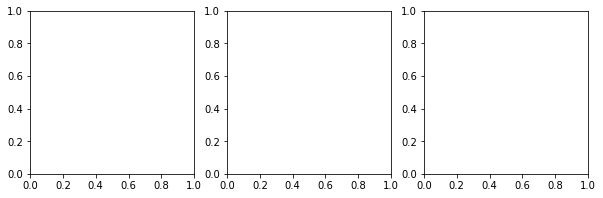

In [37]:
plt.show()
    
fig, ax = plt.subplots(1,3, figsize=(10,3))

    
    
    
for binx in range(3):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) & final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "mean"
    conf["alpha"] = fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.2
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]*nrel

    conf["nz_hyperrank"] = np.array([save_all['true_binned'][binx][maskz]]).T
    #conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf["priors"]=priors


    #conf["inv_cov"] = setup_covariance(conf)
    #covb = covariance_jck(Nz_hyp[i,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#+covb['cov'])

    conf['sys_m'] = mean_syst[binx]#+err_somp[binx]
    '''
    params,nz,nzsom,chain =  estimate(conf,agents = 20,nwalkers = 20,nsteps = 2000)
    hh = (np.array(conf["n_realisations"]*chain[:,:,-1].flatten())).astype(int)
    unique_pix, idx, idx_rep = np.unique(hh, return_index=True, return_inverse=True)
    w = np.zeros(nrel)
    w[unique_pix] = 1.*np.bincount(idx_rep, weights=np.ones(len(hh)))/len(hh)
    '''
    w = np.zeros(nrel)
    from scipy.stats import norm,multivariate_normal
    for nn in range(nrel):
        try:
            ww=compute_mean(conf["zrmg"],conf["nz_hyperrank"][nn,:])-compute_mean(conf["zrmg"],final_wz[binx]['y'])
        except:
            ww=compute_mean(conf["zrmg"],conf["nz_hyperrank"])-compute_mean(conf["zrmg"],final_wz[binx]['y'])
        
        w[nn]=norm.pdf(0.,ww,conf['sys_m'])

        w[nn]=np.mean([multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['cov']['cov'].diagonal())) for o in range(1000)])
        
    
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=w*300.)
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated]',color='dodgerblue')
  
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=np.ones(len(w)))
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.15,label=r'N$_{\rm SOMPZ}$',color='forestgreen')
  
    ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black', linestyle='dashed')
    ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ}$',color='brown',fmt='o',markerfacecolor='None')
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])])),300,"bootstrap")                      
    print dee["err"] 
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],final_wz[binx]['rel']),1000,"bootstrap")                      
    print dee["err"] 
#plt.tight_layout()
    ax[binx].set_xlabel("z",size=16)
ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on the shape]",size=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.25),
          ncol=5,  fontsize=16)
plt.savefig("./figures/comb_shape.pdf",bbox_inches="tight")
plt.show()

 35%|███▌      | 177/500 [00:03<00:06, 51.85it/s]Traceback (most recent call last):
  File "build/bdist.linux-x86_64/egg/emcee/ensemble.py", line 499, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/global/homes/m/mgatti/clustering-z/WZ_utils/magnification_mcmc.py", line 101, in log_prob
    def log_prob(p0):
KeyboardInterrupt
 36%|███▌      | 178/500 [00:03<00:06, 50.91it/s]

emcee: Exception while calling your likelihood function:
  params: [3.71954845e-06 5.00001101e-01 3.04378520e-01]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

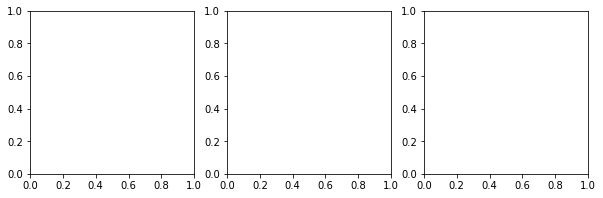

In [93]:




fig, ax = plt.subplots(1,3, figsize=(10,3))

for binx in range(3):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) & final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "mean"
    conf["alpha"] = fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.2
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]*nrel

    conf["nz_hyperrank"] = [save_all['true_binned'][binx][maskz]]
    conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf["priors"]=priors


    #conf["inv_cov"] = setup_covariance(conf)
    covb = covariance_jck(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    
    #final_wz[binx]['cov']['cov']
    conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#covb['cov'])

    conf['sys_m'] = mean_syst[binx]+err_somp[binx]


    params,nz,nzsom,chain =  estimate(conf,agents = 20,nwalkers = 50,nsteps = 500)
    hh = (np.array(conf["n_realisations"]*chain[:,:,-1].flatten())).astype(int)
    unique_pix, idx, idx_rep = np.unique(hh, return_index=True, return_inverse=True)
    w = np.zeros(nrel)
    w[unique_pix] = 1.*np.bincount(idx_rep, weights=np.ones(len(hh)))/len(hh)
    """
    w = np.zeros(nrel)
    from scipy.stats import norm
    for nn in range(nrel):
        ww=conf["nz_hyperrank"][nn,:]-final_wz[binx]['y']
        w[nn]= np.matmul(ww,np.matmul(conf["inv_cov"],ww))#np.exp(-0.5*np.matmul(ww,np.matmul(conf["inv_cov"],ww)))
    
    """
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=w*300.)
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.3,label=r'N$_{\rm SOMPZ}$ [calibrated]')
  
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=np.ones(len(w)))
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.3,label=r'N$_{\rm SOMPZ}$')
  
    ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black')
    ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ}$',color='forestgreen')
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])])),300,"bootstrap")                      
    print dee["err"] 
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],final_wz[binx]['rel']),1000,"bootstrap")                      
    print dee["err"] 
plt.tight_layout()
plt.legend()



0.01751949274039356
0.017537338420508287
0.02771756430375779
0.027043239641539766
0.015624333618688833
0.010635746318011518


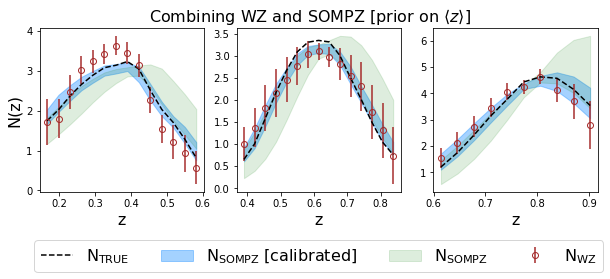

0.01751949274039356
0.017537338420508287
0.02771756430375779
0.027043239641539766
0.015624333618688833
0.010635746318011518


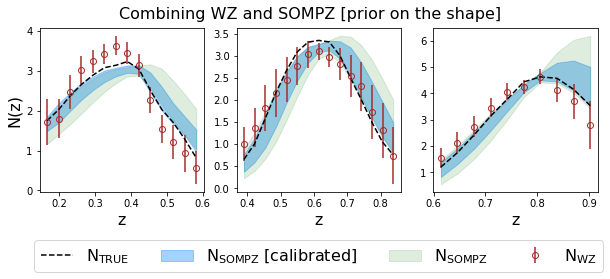

In [121]:




fig, ax = plt.subplots(1,3, figsize=(10,3))

for binx in range(3):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) & final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "mean"
    conf["alpha"] = fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.2
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]*nrel

    conf["nz_hyperrank"] = [save_all['true_binned'][binx][maskz]]
    conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf["priors"]=priors


    #conf["inv_cov"] = setup_covariance(conf)
    #covb = covariance_jck(Nz_hyp[i,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#+covb['cov'])

    conf['sys_m'] = mean_syst[binx]#+err_somp[binx]
    '''
    params,nz,nzsom,chain =  estimate(conf,agents = 20,nwalkers = 20,nsteps = 2000)
    hh = (np.array(conf["n_realisations"]*chain[:,:,-1].flatten())).astype(int)
    unique_pix, idx, idx_rep = np.unique(hh, return_index=True, return_inverse=True)
    w = np.zeros(nrel)
    w[unique_pix] = 1.*np.bincount(idx_rep, weights=np.ones(len(hh)))/len(hh)
    '''
    w = np.zeros(nrel)
    from scipy.stats import norm,multivariate_normal
    for nn in range(nrel):
        ww=compute_mean(conf["zrmg"],conf["nz_hyperrank"][nn,:])-compute_mean(conf["zrmg"],final_wz[binx]['y'])
        w[nn]=norm.pdf(0.,ww,conf['sys_m'])

        #w[nn]=np.mean([multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['cov']['cov'].diagonal())) for o in range(1000)])
        #w[nn]=multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['y'],np.diagflat(final_wz[binx]['cov']['cov'].diagonal()),allow_singular=True)

    
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=w*300.)
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated]',color='dodgerblue')
  
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=np.ones(len(w)))
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.15,label=r'N$_{\rm SOMPZ}$',color='forestgreen')
  
    ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black', linestyle='dashed')
    ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ}$',color='brown',fmt='o',markerfacecolor='None')
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])])),300,"bootstrap")                      
    print dee["err"] 
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],final_wz[binx]['rel']),1000,"bootstrap")                      
    print dee["err"] 
#plt.tight_layout()
    ax[binx].set_xlabel("z",size=16)
ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on $\langle z \rangle$]",size=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.25),
          ncol=5,  fontsize=16)
  
    
plt.savefig("./figures/comb_mean.pdf",bbox_inches="tight")
    
    
    
    
    
    
    
    
plt.show()
    
fig, ax = plt.subplots(1,3, figsize=(10,3))

    
    
    
for binx in range(3):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) & final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "mean"
    conf["alpha"] = fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.2
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]*nrel

    conf["nz_hyperrank"] = [save_all['true_binned'][binx][maskz]]
    conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf["priors"]=priors


    #conf["inv_cov"] = setup_covariance(conf)
    #covb = covariance_jck(Nz_hyp[i,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#+covb['cov'])

    conf['sys_m'] = mean_syst[binx]#+err_somp[binx]
    '''
    params,nz,nzsom,chain =  estimate(conf,agents = 20,nwalkers = 20,nsteps = 2000)
    hh = (np.array(conf["n_realisations"]*chain[:,:,-1].flatten())).astype(int)
    unique_pix, idx, idx_rep = np.unique(hh, return_index=True, return_inverse=True)
    w = np.zeros(nrel)
    w[unique_pix] = 1.*np.bincount(idx_rep, weights=np.ones(len(hh)))/len(hh)
    '''
    w = np.zeros(nrel)
    from scipy.stats import norm,multivariate_normal
    for nn in range(nrel):
        ww=compute_mean(conf["zrmg"],conf["nz_hyperrank"][nn,:])-compute_mean(conf["zrmg"],final_wz[binx]['y'])
        w[nn]=norm.pdf(0.,ww,conf['sys_m'])

        w[nn]=np.mean([multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['cov']['cov'].diagonal())) for o in range(1000)])
        
    
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=w*300.)
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.4,label=r'N$_{\rm SOMPZ}$ [calibrated]',color='dodgerblue')
  
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=np.ones(len(w)))
    
    ax[binx].fill_between(z_ref[np.array(final_wz[binx]['mask'])],cov['mean']+cov['err'],cov['mean']-cov['err'],alpha=0.15,label=r'N$_{\rm SOMPZ}$',color='forestgreen')
  
    ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label=r'N$_{\rm TRUE}$',color='black', linestyle='dashed')
    ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label=r'N$_{\rm WZ}$',color='brown',fmt='o',markerfacecolor='None')
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])])),300,"bootstrap")                      
    print dee["err"] 
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],final_wz[binx]['rel']),1000,"bootstrap")                      
    print dee["err"] 
#plt.tight_layout()
    ax[binx].set_xlabel("z",size=16)
ax[0].set_ylabel("N(z)",size=16)
fig.suptitle(r"Combining WZ and SOMPZ [prior on the shape]",size=16)
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -.25),
          ncol=5,  fontsize=16)
plt.savefig("./figures/comb_shape.pdf",bbox_inches="tight")
plt.show()

In [117]:
# magnification plots!

1

[0.0911537  0.14072754 0.10007396 0.09062602 0.07145213 0.08143286
 0.07448729 0.07933861 0.09227858 0.09248518 0.10400408 0.06025159
 0.12141445 0.14490489]
0.016703456364627008
[0.17270627 0.23834163 0.31174703 0.31805872 0.26161997 0.20568044
 0.13775034 0.08783104 0.10636229 0.17344215 0.27229021 0.30234513
 0.3059271  0.30432512 0.23695371]
0.02771932442462197
[0.22292252 0.22810776 0.24234723 0.22151128 0.1644033  0.12264868
 0.12572161 0.26508804 0.41864505 0.54109615]
0.010672533103622223


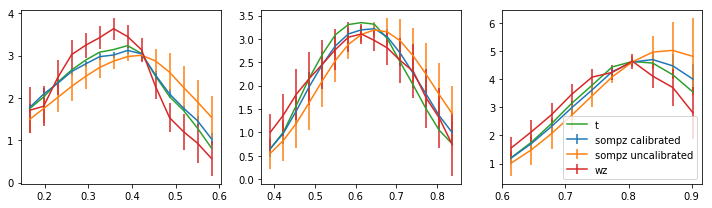

In [59]:




fig, ax = plt.subplots(1,3, figsize=(10,3))

for binx in range(3):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) & final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "mean"
    conf["alpha"] = fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.2
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    conf["Nz"]  = data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]*nrel

    conf["nz_hyperrank"] = [save_all['true_binned'][binx][maskz]]
    conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0,0.0001]]
    priors['alpha_wl'] = ["uniform",[0.5,0.50001]]
    priors['h'] = ["uniform",[0,1]]

    conf["priors"]=priors


    #conf["inv_cov"] = setup_covariance(conf)
    #covb = covariance_jck(Nz_hyp[i,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#+covb['cov'])

    conf['sys_m'] = mean_syst[binx]#+err_somp[binx]
    '''
    params,nz,nzsom,chain =  estimate(conf,agents = 20,nwalkers = 20,nsteps = 2000)
    hh = (np.array(conf["n_realisations"]*chain[:,:,-1].flatten())).astype(int)
    unique_pix, idx, idx_rep = np.unique(hh, return_index=True, return_inverse=True)
    w = np.zeros(nrel)
    w[unique_pix] = 1.*np.bincount(idx_rep, weights=np.ones(len(hh)))/len(hh)
    '''
    w = np.zeros(nrel)
    from scipy.stats import norm,multivariate_normal
    for nn in range(nrel):
        ww=compute_mean(conf["zrmg"],conf["nz_hyperrank"][nn,:])-compute_mean(conf["zrmg"],final_wz[binx]['y'])
        w[nn]=norm.pdf(0.,ww,conf['sys_m'])

        w[nn]=np.mean([multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['rel'][:,o],np.diagflat(final_wz[binx]['cov']['cov'].diagonal()/10.)) for o in range(1000)])
        #w[nn]=multivariate_normal.pdf(conf["nz_hyperrank"][nn,:],final_wz[binx]['y'],np.diagflat(final_wz[binx]['cov']['cov'].diagonal()),allow_singular=True)

    
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=w*300.)
    print cov['err']   
    ax[binx].errorbar(z_ref[np.array(final_wz[binx]['mask'])],cov['mean'],cov['err'],label='sompz calibrated')
    
    cov = covariance_jck_w(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap",w=np.ones(len(w)))

    ax[binx].errorbar(z_ref[np.array(final_wz[binx]['mask'])],cov['mean'],cov['err'],label='sompz uncalibrated')
    
    ax[binx].plot(final_wz[binx]['z'],final_wz[binx]['t'],label='t')
    ax[binx].errorbar(final_wz[binx]['z'],final_wz[binx]['y'],final_wz[binx]['cov']['err'],label='wz')
    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],(Nz_hyp[binx,:,np.array(final_wz[binx]['mask'])])),300,"bootstrap")                      

    
    dee =covariance_scalar_jck(compute_mean(z_ref[np.array(final_wz[binx]['mask'])],final_wz[binx]['rel']),1000,"bootstrap")                      
    print dee["err"] 
plt.tight_layout()
plt.legend()

# Prepare files hyperrank

In [4]:
import twopoint
import pyfits as pf

mute = pf.open("/global/cscratch1/sd/jmyles/sompz_buzzard/v0.11/2019-10-16/wide.fits")
meanz_pz = mute[1].data["tomo_bin_wide"]
redshift_pz = mute[1].data["z"]

binx = [-0.5,0.5,1.5,2.5,3.5]
hrn = 401
bins_hr = np.linspace(0.,4.,hrn)


nzs_wl=[]
nzs_wl_20 =[]
for i in range(4):
    mask_z = (meanz_pz>binx[i]) & (meanz_pz<binx[i+1] )
    nzrm,edge = np.histogram(redshift_pz[mask_z], bins = bins_hr)
    mm[4].data['BIN{0}'.format(i+1)]=nzrm
if os.path.exists("./cosmosis/intermediate_true.fits"):
    os.remove("./cosmosis/intermediate_true.fits")
mm.writeto("./cosmosis/intermediate_true.fits")







# I need to produce finals with true xipxim and different nz

# 1 file with truez 
# 1 file with truez + 1 sompz 

import math
bins = ['0.2_0.43', '0.43_0.63', '0.63_0.9', '0.9_1.3']
mm = pf.open("/global/cscratch1/sd/mgatti/cosmosis/cosmosis/cosmic_shear/input_16.fits")

for i in range(4):
    mask_z = (meanz_pz>binx[i]) & (meanz_pz<binx[i+1] )
    nzrm,edge = np.histogram(redshift_pz[mask_z], bins = bins_hr)
    mm[4].data['BIN{0}'.format(i+1)]=nzrm
if os.path.exists("./cosmosis/intermediate_true.fits"):
    os.remove("./cosmosis/intermediate_true.fits")
mm.writeto("./cosmosis/intermediate_true.fits")

xip=[]
xim=[]
for h1,i in enumerate(bins):
    for h2,j in enumerate(bins):
      if h1>= h2 :
        #try:
            
            path_cosmosis = "/global/cscratch1/sd/mgatti/cosmosis_new/cosmosis/hyperrank/intermediate_true/"
            mute_c1 = np.loadtxt(path_cosmosis+"/shear_xi_minus/bin_{0}_{1}.txt".format(h1+1,h2+1))  
            mute_c2 = np.loadtxt(path_cosmosis+"/shear_xi_plus/bin_{0}_{1}.txt".format(h1+1,h2+1))  
            
            mute_theta = np.loadtxt(path_cosmosis+"/shear_xi_plus/theta.txt".format(h1+1,h2+1))*60./((2*math.pi)/360)
            

            f = interp1d(mute_theta,mute_c2)
            xip.append(f(mm[2].data['ANG'][:20]))
            f = interp1d(mute_theta,mute_c1)
            xim.append(f(mm[2].data['ANG'][:20]))

mm[3].data['VALUE'] = np.array(xim).flatten()
mm[2].data['VALUE'] = np.array(xip).flatten()

mm.writeto("./cosmosis/run_truenz.fits")







import math
bins = ['0.2_0.43', '0.43_0.63', '0.63_0.9', '0.9_1.3']
mm = pf.open("/global/cscratch1/sd/mgatti/cosmosis/cosmosis/cosmic_shear/input_16.fits")



# load 
import pyfits as pf
muthyp = pf.open("./cosmosis/hyperrank1.fits")
nrel = 300
Nz_hyp = np.zeros((4,nrel,400))
for i in range(nrel):
    for j in range(4):
        nz=muthyp[i+1].data['BIN{0}'.format(j+1)]
        z=muthyp[i+1].data['Z_MID']
        Nz_hyp[j,i,:]=nz

    

    
for i in range(4):

    mm[4].data['BIN{0}'.format(i+1)]=np.mean(Nz_hyp[i,:,:],axis=0)
if os.path.exists("./cosmosis/intermediate_true.fits"):
    os.remove("./cosmosis/intermediate_true.fits")
mm.writeto("./cosmosis/intermediate_true.fits")




xip=[]
xim=[]
for h1,i in enumerate(bins):
    for h2,j in enumerate(bins):
      if h1>= h2 :
        #try:
            
            path_cosmosis = "/global/cscratch1/sd/mgatti/cosmosis_new/cosmosis/hyperrank/intermediate_true/"
            mute_c1 = np.loadtxt(path_cosmosis+"/shear_xi_minus/bin_{0}_{1}.txt".format(h1+1,h2+1))  
            mute_c2 = np.loadtxt(path_cosmosis+"/shear_xi_plus/bin_{0}_{1}.txt".format(h1+1,h2+1))  
            
            mute_theta = np.loadtxt(path_cosmosis+"/shear_xi_plus/theta.txt".format(h1+1,h2+1))*60./((2*math.pi)/360)
            

            f = interp1d(mute_theta,mute_c2)
            xip.append(f(mm[2].data['ANG'][:20]))
            f = interp1d(mute_theta,mute_c1)
            xim.append(f(mm[2].data['ANG'][:20]))

mm[3].data['VALUE'] = np.array(xim).flatten()
mm[2].data['VALUE'] = np.array(xip).flatten()

mm.writeto("./cosmosis/run_sompz.fits")
def rgb_to_hex(rgb):
    return '#%02x%02x%02x' % rgb

c_2=rgb_to_hex((239, 96, 96))
c_3=rgb_to_hex((255, 194, 0)) 
c_23=rgb_to_hex((121, 183, 179)) 
c_cs="black"#rgb_to_hex((161, 13, 79)) 


KeyError: 4

# Magnification assessment

(14,) (14,) (14,)


<ErrorbarContainer object of 3 artists>

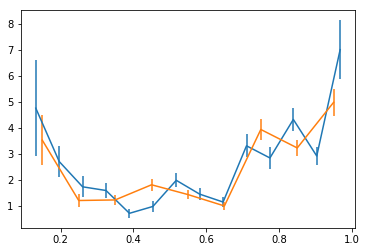

In [4]:
from scipy.interpolate import interp1d
mag = [4.75999999999999, 2.7036144578313195, 1.7288135593220302, 1.5865529352734538, 0.7071057192374335, 0.9710264900662231, 1.9791591807402042, 1.4463422494360265, 1.14165792235047, 3.309385863267664, 2.841225626740941, 4.325525040387713, 2.91670120182345, 7.016778523489918]
mage = [1.8406114925933315, 0.5840017802367945, 0.39996406994487765, 0.28716091250552694, 0.1773881147852625, 0.20343449491546078, 0.2719298668713339, 0.21958477158641512, 0.20294482137185857, 0.44935217489517343, 0.40736778328401196, 0.43098570241296513, 0.35611447174439476, 1.1329022170049647]
binedges = np.linspace(0.1,1.0,len(mag)+1)
bincentres = (binedges[1:]+binedges[:-1])/2.
print np.array(mag).shape,np.array(mage).shape,bincentres.shape
fmag = interp1d(bincentres,np.array(mag))
alpha = fmag(save_all['info']['z_ref'])

plt.errorbar(bincentres,np.array(mag),np.array(mage))

mag = [3.525925925925918, 1.2012847965738733, 1.222807017543857, 1.807248322147647, 1.4296977660972374, 0.9910128734515403, 3.9387978142076423, 3.2271498107084846, 4.986666666666657]
mage = [0.958492383683438, 0.257618535130804, 0.19211166708227506, 0.22441899652629638, 0.17996033524398092, 0.1574522529284597, 0.38988649287944155, 0.30303306155626925, 0.5132837130632736]
binedges = np.linspace(0.1,1.0,len(mag)+1)
bincentres = (binedges[1:]+binedges[:-1])/2.
fmag = interp1d(bincentres,np.array(mag))

plt.errorbar(bincentres,np.array(mag),np.array(mage))









/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


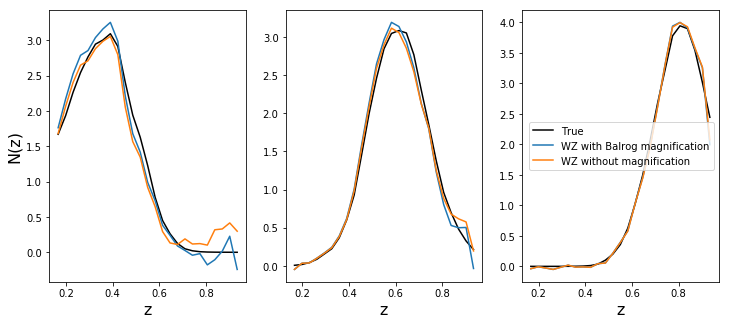

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
hh=1
bb = np.sqrt(save_all['runs'][hh]['bz'][:,:,0]/save_all['auto_theory'][:,:])
bb[:,-1]=np.ones(4)

i=0
b_wl = np.sqrt(save_all['b_wl'][i,:,0]/save_all['auto_theory'][i])
b_wl[-1]=b_wl[-2]
#plt.plot(b_wl)

alpha1 = np.array([1.98890508, 1.78284655, 1.57678801, 1.37072947, 1.16467093,
       1.20623674, 1.30494663, -1.40365651, -.5023664 , -1.60107629,
       -1.58641475, -1.49747538, 1.40853601, 1.31959665, 1.23065728,
       1.38247195, 1.90175331, 2.42103468, 2.94031604, 2.,
       3.88, 3.88005068, 3.87881882, 3.87758696, 3.8763551 ])
fig, ax = plt.subplots(1,3, figsize=(12,5))

for i in range(3):
    
    bbww = copy.copy(save_all['b_wl'][:,:,0])
    bbww[i,bbww[i,:]==0.]=1.
    ax[i].plot(save_all['info']['z_ref'],save_all['true_binned'][i]/np.trapz(save_all['true_binned'][i],save_all['info']['z_ref']),label="True",color='black')


    rel = save_all['nz_theory'][i]/save_all['true_binned'][i]/save_all['auto_theory'][i]
    rel[-1]=rel[0]





    #plt.plot(save_all['info']['z_ref'],yy/np.trapz(yy,save_all['info']['z_ref']))

    

    #dd =  (save_all['runs'][hh]['Nz'][:,:,0]-0.5*((alpha-2.)*b_wl*save_all['mag_pos1'])-0.*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    #ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']))
    
    #dd =  (save_all['runs'][hh]['Nz'][:,:,0]-0.5*((alpha-2.)*b_wl*save_all['mag_pos1'])+0.*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    #ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']),label='with arbtrary mag')

    dd =  (save_all['runs'][hh]['Nz'][:,:,0]-0.5*((alpha-2.)*b_wl*save_all['mag_pos1'])+0.*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']),label='WZ with Balrog magnification')

    dd =  (save_all['runs'][hh]['Nz'][:,:,0]-0.*((alpha1-2.)*b_wl*save_all['mag_pos1'])+0.*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']),label='WZ without magnification')
    ax[i].set_xlabel(r"z",size=16)
    
ax[0].set_ylabel(r"N(z)",size=16)
plt.legend()


<ErrorbarContainer object of 3 artists>

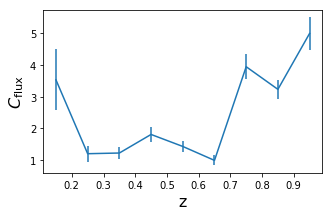

In [121]:
fig, ax = plt.subplots(1,1, figsize=(5,3))

plt.ylabel(r"$C_{\rm flux}$",size=16)
plt.xlabel(r"z",size=16)
plt.errorbar(bincentres,np.array(mag),np.array(mage))
#plt.errorbar(save_all['info']['z_ref'],alpha1,alpha*0.1)


In [150]:
import numpy as np

def setup_covariance(conf):
    default_estimator = np.zeros((len(conf["zrmg"] ),conf["n_jck"]))

    for jk in range(conf["n_jck"]):
        alp_bot = np.random.normal(0.,conf["e_alpha"],len(conf["zrmg"] ))/(conf["n_jck"]-1.)
        default_estimator[:,jk] = (conf["Nz"][:,jk+1]-(conf["alpha"]*(1+alp_bot)-2.)*conf["mag_hyperrank2"][0]-conf["bias_rmg"][:,jk+1]*conf["mag_hyperrank2"][0])/conf["bias_tot"][:,jk+1]
        default_estimator[:,jk] = default_estimator[:,jk]/np.trapz(default_estimator[:,jk],conf["zrmg"] )
        cov = covariance_jck(default_estimator,save_all['n_jck'],"jackknife")
    return np.linalg.inv(cov['cov'])



from multiprocessing import Pool,sharedctypes
from functools import partial
from contextlib import closing
import emcee


def weighted_percentile(data, percents, weights=None):

    if weights is None:
        return np.percentile(data, percents)
    ind = np.argsort(data)
    d = data[ind]
    w = weights[ind]
    p = 1.*w.cumsum()/w.sum()*100
    y = np.interp(percents, p, d)
    return y

def constraints(param, w):
    low = weighted_percentile(param, 16, weights=w)
    high = weighted_percentile(param, 84, weights=w)
    
    low2 = weighted_percentile(param, 29, weights=w)
    high2 = weighted_percentile(param, 71, weights=w)

    return np.average(param, weights=w),low,high

def setup_priors(priors):
    initial_values = []
    list_var = []
    prior_function =dict()
    
    for key in priors.keys():
        if priors[key][0]=="uniform":
            prior_function.update({key: {'kind': 'uniform', 'weight': 1,
                                   'kwargs': {'loc': priors[key][1][0], 'scale': priors[key][1][1]-priors[key][1][0]}}}) 
        elif priors[key][0]=="gaussian":
            prior_function.update({key: {'kind': 'truncnorm', 'weight': 1,
                                    'kwargs': {'a': -8.0, 'b': 8.0,
                                               'loc': priors[key][1][0], 'scale': priors[key][1][1]}}})
            
    from scipy import stats
    for key in prior_function.keys():
        
        if "multi" in key:
            prior_function[key] = prior_function[key]
        else:
            prior_function[key]= getattr(stats, prior_function[key]['kind'])(**prior_function[key]['kwargs'])
    return prior_function

def estimate(conf,agents,nwalkers = 20,nsteps = 1000):
    def comput_nz(p0):
        hyp = int(p0[2]*conf["n_realisations"])
        #try:
        y = (conf["Nz"][:,0]-2*p0[0]*np.array(p0[3:]-2.)*conf["mag_hyperrank2"][ hyp ]-2*(p0[1]-2.)*conf["bias_rmg"][:,0]*conf["mag_hyperrank1"][ hyp ])/conf["bias_tot"][:,0]
        #y = (conf["Nz"][:,0]-2*np.array(p0[3:]-2.)*conf["mag_hyperrank2"][ hyp ]-0.*(p0[1]-2.)*conf["bias_rmg"][:,0]*conf["mag_hyperrank1"][ hyp ])/conf["bias_tot"][:,0]
           
        #except:
        #    y = (conf["Nz"][:,0]-2.*p0[0]*(conf["alpha"]-2.)*conf["mag_hyperrank2"][ hyp ]-2*(p0[1]-2.)*conf["bias_rmg"][:,0]*conf["mag_hyperrank1"][ hyp ])/conf["bias_tot"][:,0]
            
        y = y/np.trapz(y,conf["zrmg"])
        return y,np.trapz(y*conf["zrmg"],conf["zrmg"])/np.trapz(y,conf["zrmg"])
        
    def compute_nz_som(p0):
        hyp = int(p0[2]*conf["n_realisations"])
        th = conf["nz_hyperrank"][hyp]
        tt = th/np.trapz(th,conf["zrmg"])
        return tt,np.trapz(tt*conf["zrmg"],conf["zrmg"])/np.trapz(tt,conf["zrmg"])
    def lnlike(p0):
      
        
        hyp = int(p0[2]*conf["n_realisations"])
        

        y,ym = comput_nz(p0)
        tt,ttm = compute_nz_som(p0)
        w = tt-y
        wm = ttm-ym
        
        chi2=np.matmul(w,np.matmul(conf["inv_cov"],w))
        chi2 = np.sum(w*w/(0.01*w)**2)
        """
        if conf["method"] ==  'mean':
            
            
            chi2 = wm**2/conf['sys_m']**2
        if conf["method"] ==  'shape':
            chi2=np.matmul(w,np.matmul(conf["inv_cov"],w))
    
        if conf["method"] ==  'both':
            chi2=np.matmul(w,np.matmul(conf["inv_cov"],w))+ wm**2/conf['sys_m']**2
        """

        
        
        return -0.5 * chi2
    
    def log_prob(p0):

        lp = np.sum(lnprior(p0))
        
        if not np.isfinite(lp):
            return -np.inf
 
        ll = lnlike(p0)
        
        if not np.isfinite(ll):
            return -np.inf
        return ll
    
    def lnprior(p0):


        logprior = []
        logprior.append(conf["prior_function"]['alpha_wl'].logpdf(p0[1]))
        logprior.append(conf["prior_function"]['b_wl'].logpdf(p0[0]))
        logprior.append(conf["prior_function"]['h'].logpdf(p0[2]))
        #try:
        for i in range(len(p0)-3):
                 logprior.append(conf["prior_function"]['alpha_{0}'.format(i)].logpdf(p0[3+i]))
       # except:
        #         pass
        return np.array(logprior)
    
    ndim = len(conf["priors"].keys())
    conf["prior_function"]= setup_priors(conf["priors"])  
    i1=[]
    i2=[]
    i3=[]
    for j in range(nwalkers):
        i1.append(conf["prior_function"]['b_wl'].rvs())
        i2.append(conf["prior_function"]['alpha_wl'].rvs())
        i3.append(conf["prior_function"]['h'].rvs())
    aa = [i1,i2,i3]
    for i in range(ndim-3):
        bb = []
        for j in range(nwalkers):
            bb.append(conf["prior_function"]['alpha_{0}'.format(i)].rvs())
        aa.append(np.array(bb).flatten())
    #print aa
    initial = np.array(np.vstack(aa)).T
    #print initial.shape
    #initial= np.random.uniform(0,1,nwalkers*ndim).reshape(nwalkers, ndim)
    #with closing(Pool(processes=agents)) as pool:
    
    sampler = emcee.EnsembleSampler(nwalkers,ndim, log_prob)
            
    sampler.run_mcmc(initial, nsteps, progress=True)
    
    params = dict()
    
    b0,bl,bh  = constraints(sampler.chain[:,:,0].flatten(),np.ones(len(sampler.chain[:,:,0].flatten())))
    params["bwl"]=b0,b0-bl,bh-b0
    print "b_wl {0:2.2f} + {1:2.2f} - {2:2.2f}".format(b0,b0-bl,bh-b0)
    
    b1,bl,bh  = constraints(sampler.chain[:,:,1].flatten(),np.ones(len(sampler.chain[:,:,1].flatten())))
    print "alpha_wl {0:2.2f} + {1:2.2f} - {2:2.2f}".format(b1,b1-bl,bh-b1)
    params["awl"]=b1,b1-bl,bh-b1
    
    b2,bl,bh  = constraints(sampler.chain[:,:,2].flatten(),np.ones(len(sampler.chain[:,:,2].flatten())))
    
    print (b2  )                 
    print "h {0} + {1} - {2}".format(int(b2*conf["n_realisations"]),int(conf["n_realisations"]*(b2-bl)),int(conf["n_realisations"]*(bh-b2)))
    params["h"]=int(b2),int(b2-bl),int(bh-b2)
    
    alphaa=[]
    for i in range(ndim-3):
            b2,bl,bh  = constraints(sampler.chain[:,:,3+i].flatten(),np.ones(len(sampler.chain[:,:,3+i].flatten())))
            alphaa.append(b2)    
            print "alpha_{0}: {1:2.2f} + {2:2.2f} - {3:2.2f}".format(i,b2,b2-bl,bh-b2)
    #except:
    #    pass
    return params,alphaa# comput_nz([b0,b1,b2]),compute_nz_som([b0,b1,b2]),sampler.chain






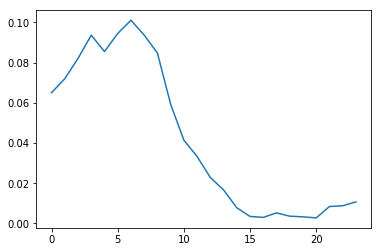

In [48]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(conf["Nz"][:,0])

In [93]:

for binx in range(1):



    # 2 sigma criteria **********************
    maskz = ( save_all['info']['z_ref']>0.1) & ( save_all['info']['z_ref']<0.91) #& final_wz[binx]['mask']

    conf = dict()

    conf["method"] = "shape"
    conf["alpha"] = np.zeros(len(save_all['info']['z_ref'][maskz]))#0.*fmag(save_all['info']['z_ref'][maskz])
    conf["e_alpha"] = 0.0
    conf["zrmg"] = save_all['info']['z_ref'][maskz]
    data_vect = copy.copy(save_all['runs'][1])
    
    conf["Nz"]  = save_all['runs'][1]['Nz'][binx ,maskz,:]#data_vect["Nz"][binx ,maskz,:]
    conf["bias_tot"] = np.sqrt(data_vect["bz"][binx,maskz,:]/save_all['b_wl'][binx,maskz,])
    conf["bias_rmg"] = compute_bias(data_vect["bz"],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl"] = compute_bias(save_all['b_wl'],save_all['auto_theory'],binx)[maskz,:]
    conf["bias_wl_ave"] = np.trapz((conf["bias_wl"]*conf["Nz"])[:,0],conf["zrmg"])/np.trapz((conf["Nz"])[:,0],conf["zrmg"])

    conf["mag_hyperrank1"] = [save_all['mag_pos'][binx,maskz]]#*nrel
    conf["mag_hyperrank2"] = [save_all['mag_pos1'][binx,maskz]]#*nrel

    conf["nz_hyperrank"] = [save_all['true_binned'][binx][maskz]]
    #conf["nz_hyperrank"] = Nz_hyp[binx,:,maskz].T

    conf["n_realisations"] = len(conf["nz_hyperrank"] )
    conf["n_jck"] = save_all['n_jck']


    priors = dict()
    priors["b_wl"] = ["uniform",[0.01,3.]]
    priors['alpha_wl'] = ["uniform",[0.,3.0]]
    priors['h'] = ["uniform",[0,1]]
    for i in range((len(save_all['info']['z_ref'][maskz]))):
        #if i<10:
        priors['alpha_{0}'.format(i)] = ["uniform",[2.,2.01]]
        #else:
        priors['alpha_{0}'.format(i)] = ["uniform",[-1.,5.0]]
    conf["priors"]=priors


    conf["inv_cov"] = setup_covariance(conf)
    #covb = covariance_jck(Nz_hyp[i,:,np.array(final_wz[binx]['mask'])],nrel,"bootstrap")
    #conf["inv_cov"]  = np.linalg.inv(final_wz[binx]['cov']['cov'])#+covb['cov'])

    conf['sys_m'] = 0.#mean_syst[binx]#+err_somp[binx]
    
    
 

/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until
/global/u2/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


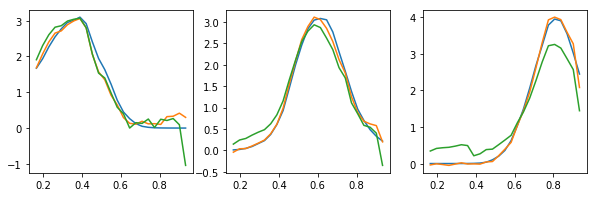

In [97]:
#params,alphaa =  estimate(conf,agents = 60,nwalkers = 120,nsteps = 2000)
hh=1
bb = np.sqrt(save_all['runs'][hh]['bz'][:,:,0]/save_all['auto_theory'][:,:])
bb[:,-1]=np.ones(4)

i=0
b_wl = np.sqrt(save_all['b_wl'][i,:,0]/save_all['auto_theory'][i])
b_wl[-1]=b_wl[-2]
#plt.plot(b_wl)

alpha = np.array([1.98890508, 1.78284655, 1.57678801, 1.37072947, 1.16467093,
       1.20623674, 1.30494663, -1.40365651, -.5023664 , -1.60107629,
       -1.58641475, -1.49747538, 1.40853601, 1.31959665, 1.23065728,
       1.38247195, 1.90175331, 2.42103468, 2.94031604, 2.,
       3.88, 3.88005068, 3.87881882, 3.87758696, 3.8763551 ])
alpha[:-1]=alphaa 
fig, ax = plt.subplots(1,3, figsize=(10,3))

for i in range(3):
    
    bbww = copy.copy(save_all['b_wl'][:,:,0])
    bbww[i,bbww[i,:]==0.]=1.
    ax[i].plot(save_all['info']['z_ref'],save_all['true_binned'][i]/np.trapz(save_all['true_binned'][i],save_all['info']['z_ref']))


    rel = save_all['nz_theory'][i]/save_all['true_binned'][i]/save_all['auto_theory'][i]
    rel[-1]=rel[0]





    #plt.plot(save_all['info']['z_ref'],yy/np.trapz(yy,save_all['info']['z_ref']))

    

    dd =  (save_all['runs'][hh]['Nz'][:,:,0]-0.*((alpha-2.)*b_wl*save_all['mag_pos1'])-0.*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']))
    
    dd =  (save_all['runs'][hh]['Nz'][:,:,0]-2*((alpha-2.)*params["bwl"][0]*save_all['mag_pos1'])+2*bb*params['awl'][0]*save_all['mag_pos'])/np.sqrt(save_all['runs'][hh]['bz'][:,:,0]*bbww[i,:])#*rel
    ax[i].plot(save_all['info']['z_ref'],dd[i]/np.trapz(dd[i],save_all['info']['z_ref']))



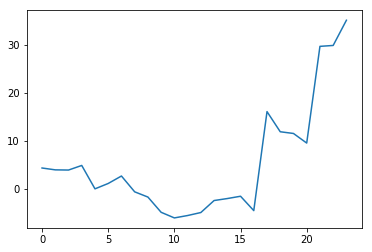

In [91]:
#

B1 = save_all['true_binned'][binx][maskz]#/np.trapz(save_all['true_binned'][binx][maskz],save_all['info']['z_ref'][maskz])
B2 = save_all['runs'][hh]['Nz'][binx,maskz,0]#/np.trapz(save_all['runs'][hh]['Nz'][binx,maskz,0],save_all['info']['z_ref'][maskz])


A = np.zeros((24,24))
N = np.zeros(24)
#for i in range()
for j in range(24):
    if j>15:
        A[j,j]=save_all['mag_pos1'][0][j]
    else:
        A[j,j]=0.1
B=B1/np.trapz(B1,save_all['info']['z_ref'][maskz])-B2/np.trapz(B2,save_all['info']['z_ref'][maskz])
B=-B
plt.plot(np.linalg.solve(A,B))
#plt.plot(B)
#plt.plot(B1)
#plt.plot(B-B1)

In [7]:
i=0
np.trapz(bias_wl[:,0]*tht[i],z_ref)/np.trapz(tht[i],z_ref)

nan

In [32]:
save_all['b_wl'].shape

(4, 20, 101)

In [36]:
data_vect

'/global/cscratch1/sd/giannini/clusteringz/Y3buzzard/cross_corr_truez/'

In [4]:
save_all['mag_pos'][i,:]

array([2.44451990e-03, 2.32685355e-03, 2.10506085e-03, 1.81930342e-03,
       1.49234329e-03, 1.19980083e-03, 9.14103636e-04, 6.60977446e-04,
       4.62582983e-04, 3.05909443e-04, 1.92244250e-04, 1.14037317e-04,
       6.33320128e-05, 3.40207948e-05, 1.82569256e-05, 1.02402829e-05,
       6.36367595e-06, 4.60460236e-06, 3.67665671e-06, 3.09328685e-06,
       2.66837758e-06, 2.32628638e-06, 2.03292094e-06, 1.76168731e-06,
       5.14738821e-26])

In [56]:
i1,i2,i3,=[],[],[]
for i in range(30):
    i1.append(0)
    i2.append(0)
    i3.append(0)


/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


IndexError: arrays used as indices must be of integer (or boolean) type

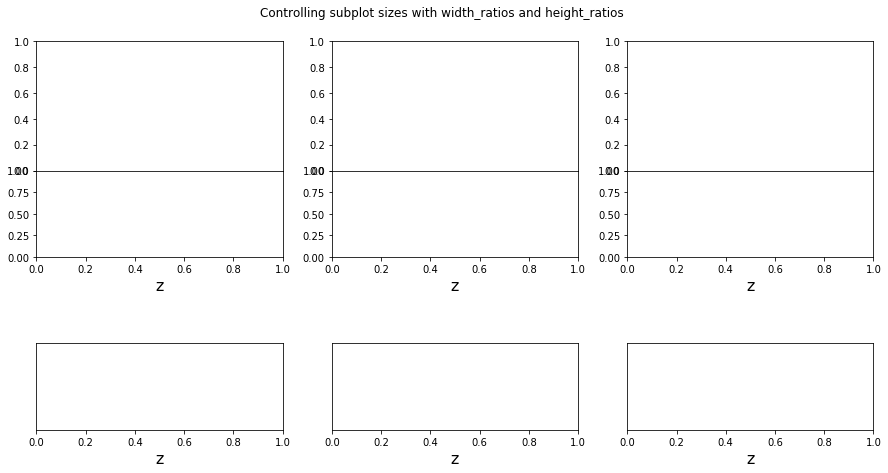

In [36]:
from matplotlib.gridspec import GridSpec



    #fig, ax = plt.subplots(3,3, figsize=(15,8))
    #fig.subplots_adjust(wspace=0.4,hspace=0.5)

plt.show()

In [17]:
(data_vect["Nz"][i,:,jk]-bwl_ave*(alpha_mag*(1+alp_bot)-2.)*save_all['mag_pos1'][i,:]-0.*bias[:,jk]*save_all['mag_pos'][i,:])/(bias[:,jk]*bias_wl[:,jk])

array([ 0.0560868 ,  0.06362712,  0.05863141,  0.08222902,  0.0665069 ,
        0.05643847,  0.03456574,  0.00162349,  0.01485594, -0.04280291,
       -0.00697078,  0.02218972, -0.01963192,  0.00176268,  0.02730185])

array([4.07757568e-01, 1.46352375e-01, 9.73195182e-02, 1.24983803e-01,
       3.17640633e-01, 1.93873032e-02, 1.31087036e-01, 3.14136136e-01,
       4.05191041e-01, 7.91383148e-02, 4.06872937e-01, 1.65509296e-02,
       1.29510660e-01, 1.74537463e-01, 3.06652910e-02, 3.89441324e-02,
       3.04801506e-01, 3.85520479e-01, 1.04724944e-01, 1.33245790e-01,
       9.94198007e-03, 3.73800577e-02, 2.44046710e-08, 3.07068787e-01,
       1.69679257e-01, 1.36332088e-01, 8.17249329e-03, 2.61733983e-02,
       1.87702961e-04, 1.57085660e-01, 4.83185644e-02, 2.15359187e-01,
       1.28939444e-01, 3.32423063e-03, 6.86404513e-03, 3.64738602e-03,
       3.18836895e-02, 3.44822490e-01, 1.42224542e-01, 1.49881412e-01,
       4.42840247e-02, 3.06146441e-01, 3.75300030e-02, 3.03135865e-01,
       1.98295069e-02, 1.37762697e-02, 9.27938170e-03, 2.26906547e-01,
       5.81036113e-02, 1.45080043e-01, 3.31531349e-01, 1.98011707e-01,
       9.53297257e-03, 3.25439357e-01, 7.29268437e-03, 3.96924402e-02,
      

In [183]:
import h5py as h5
mute = h5.File("/global/cscratch1/sd/aamon/sompz_data/v0.12/sompz_data.h5","r")

In [254]:
mute.close()

AttributeError: 'numpy.ndarray' object has no attribute 'close'